In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True, font_scale=1.5)
from pylab import rcParams
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import month_plot, plot_acf, plot_pacf
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from IPython.display import display
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import itertools
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#rose=pd.read_csv('Rose.csv',parse_dates=True,squeeze=True,index_col=0)
shoe=pd.read_csv('ShoeSales.csv')

In [3]:
display(shoe.head())
display(shoe.tail())

,YearMonth,Shoe_Sales
0,1980-01,85
1,1980-02,89
2,1980-03,109
3,1980-04,95
4,1980-05,91


,YearMonth,Shoe_Sales
182,1995-03,188
183,1995-04,195
184,1995-05,189
185,1995-06,220
186,1995-07,274


In [4]:
shoe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   YearMonth   187 non-null    object
 1   Shoe_Sales  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


In [5]:
date = pd.date_range(start='1/1/1980', end='1/1/1996', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1995-03-31', '1995-04-30', '1995-05-31', '1995-06-30',
               '1995-07-31', '1995-08-31', '1995-09-30', '1995-10-31',
               '1995-11-30', '1995-12-31'],
              dtype='datetime64[ns]', length=192, freq='M')

In [6]:
shoe['Time_Stamp'] = pd.DataFrame(date,columns=['YearMonth'])
shoe.head()

,YearMonth,Shoe_Sales,Time_Stamp
0,1980-01,85,1980-01-31
1,1980-02,89,1980-02-29
2,1980-03,109,1980-03-31
3,1980-04,95,1980-04-30
4,1980-05,91,1980-05-31


In [7]:
shoe = shoe.set_index('Time_Stamp')
shoe.drop(['YearMonth'], axis=1, inplace=True)
shoe.head()

,Shoe_Sales
Time_Stamp,
1980-01-31,85
1980-02-29,89
1980-03-31,109
1980-04-30,95
1980-05-31,91


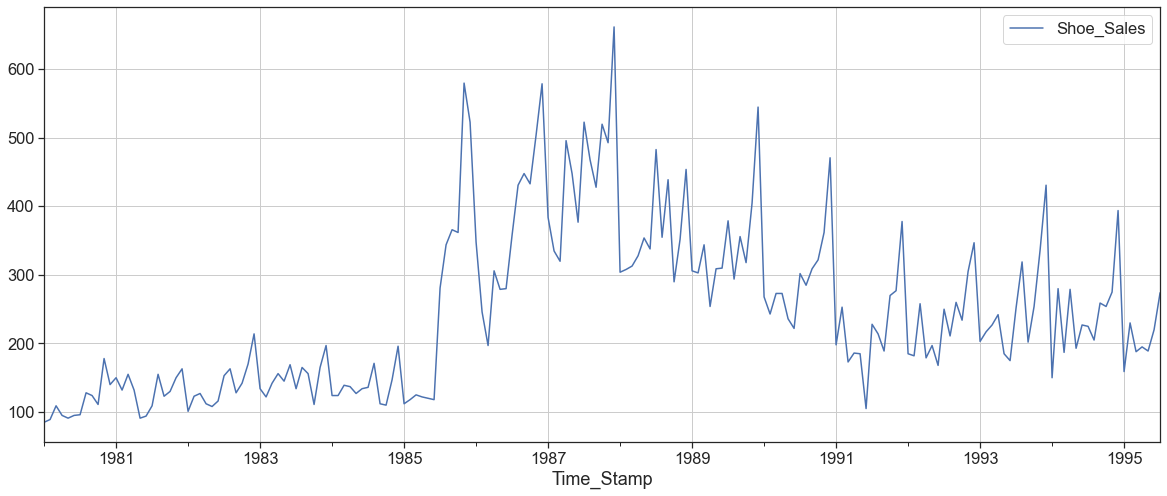

In [8]:
shoe.plot(figsize=(20,8))
plt.grid();

In [9]:
shoe.isna().sum()

Shoe_Sales    0
dtype: int64

In [10]:
#shoe=shoe.interpolate(method='linear')

In [11]:
#shoe.isna().sum()

In [12]:
#Monthly Sales
monthly_sales_across_years = pd.pivot_table(shoe, values = 'Shoe_Sales', columns = shoe.index.month_name(),
                                            index = shoe.index.year)
monthly_sales_across_years

Time_Stamp,April,August,December,February,January,July,June,March,May,November,October,September
Time_Stamp,,,,,,,,,,,,
1980,95.0,128.0,140.0,89.0,85.0,96.0,95.0,109.0,91.0,178.0,111.0,124.0
1981,132.0,155.0,163.0,132.0,150.0,109.0,94.0,155.0,91.0,150.0,130.0,123.0
1982,112.0,163.0,214.0,123.0,101.0,153.0,116.0,127.0,108.0,170.0,142.0,128.0
1983,156.0,165.0,197.0,122.0,134.0,134.0,169.0,142.0,145.0,165.0,111.0,156.0
1984,137.0,171.0,196.0,124.0,124.0,136.0,134.0,139.0,127.0,147.0,110.0,112.0
1985,122.0,344.0,523.0,118.0,112.0,281.0,118.0,125.0,120.0,580.0,362.0,366.0
1986,306.0,431.0,579.0,246.0,348.0,358.0,280.0,197.0,279.0,504.0,433.0,448.0
1987,496.0,468.0,662.0,335.0,384.0,523.0,377.0,320.0,448.0,493.0,520.0,428.0
1988,328.0,355.0,454.0,308.0,304.0,483.0,338.0,313.0,354.0,352.0,290.0,439.0


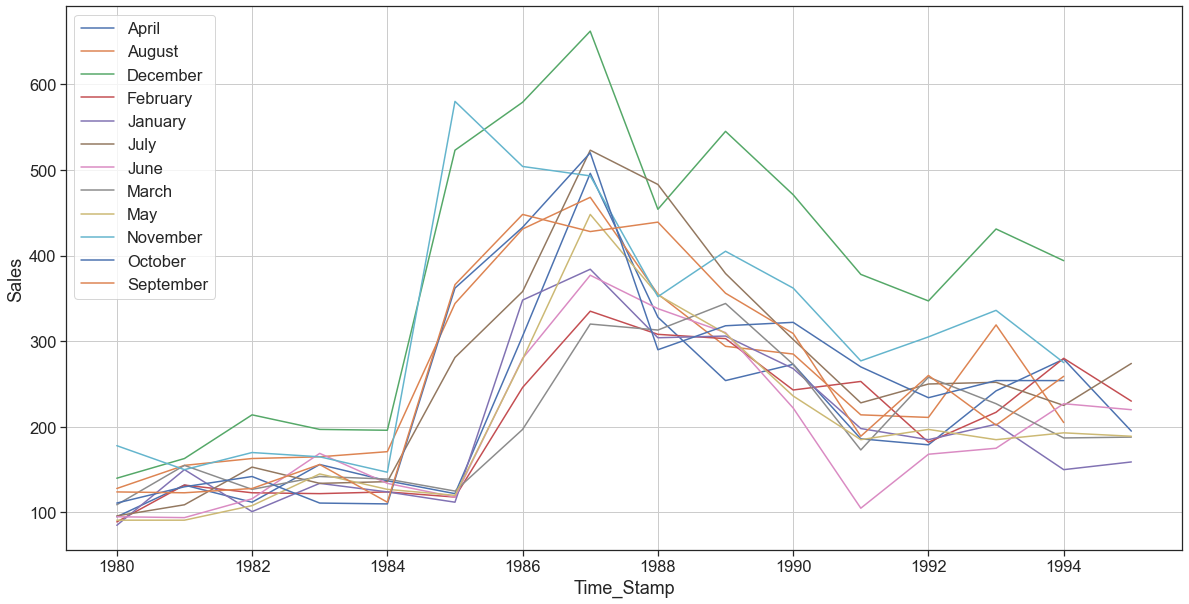

In [13]:
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.ylabel("Sales")
plt.legend(loc='best');

In [14]:
round(shoe.describe(),3)

,Shoe_Sales
count,187.000
mean,245.636
std,121.391
min,85.000
25%,143.500
50%,220.000
75%,315.500
max,662.000


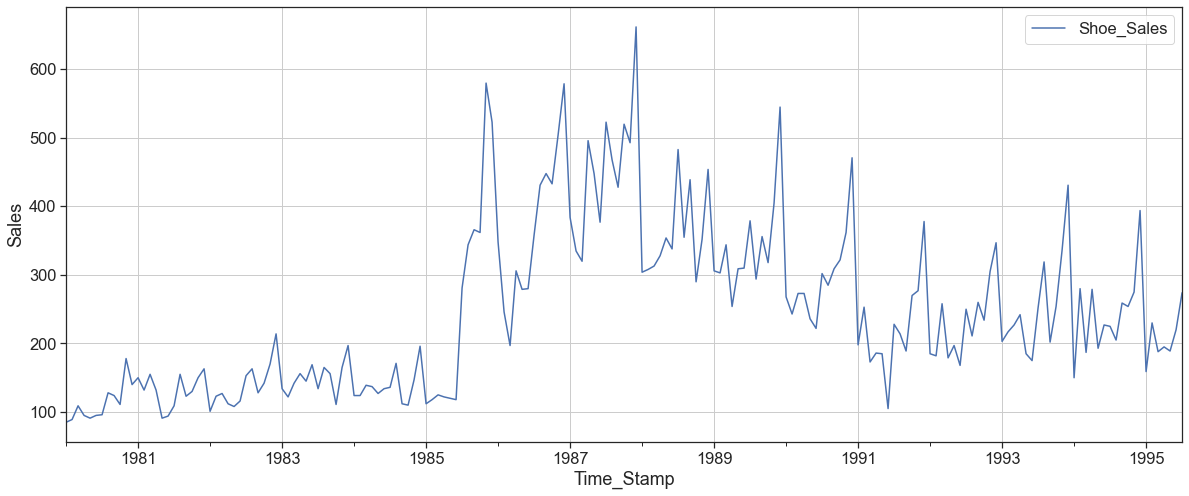

In [15]:
shoe.plot(figsize=(20,8))
plt.ylabel("Sales")
plt.grid();

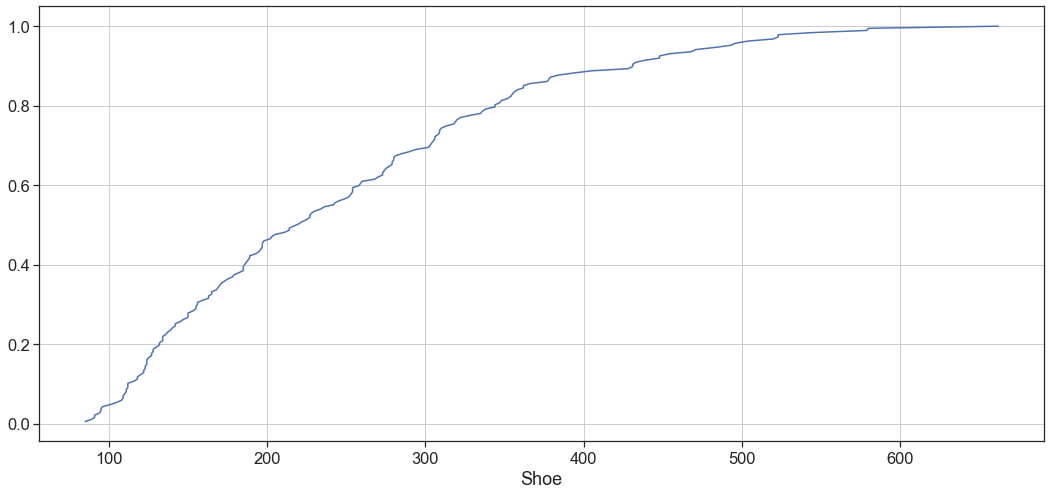

In [16]:
plt.figure(figsize=(18, 8))
cdf = ECDF(shoe['Shoe_Sales'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Shoe');

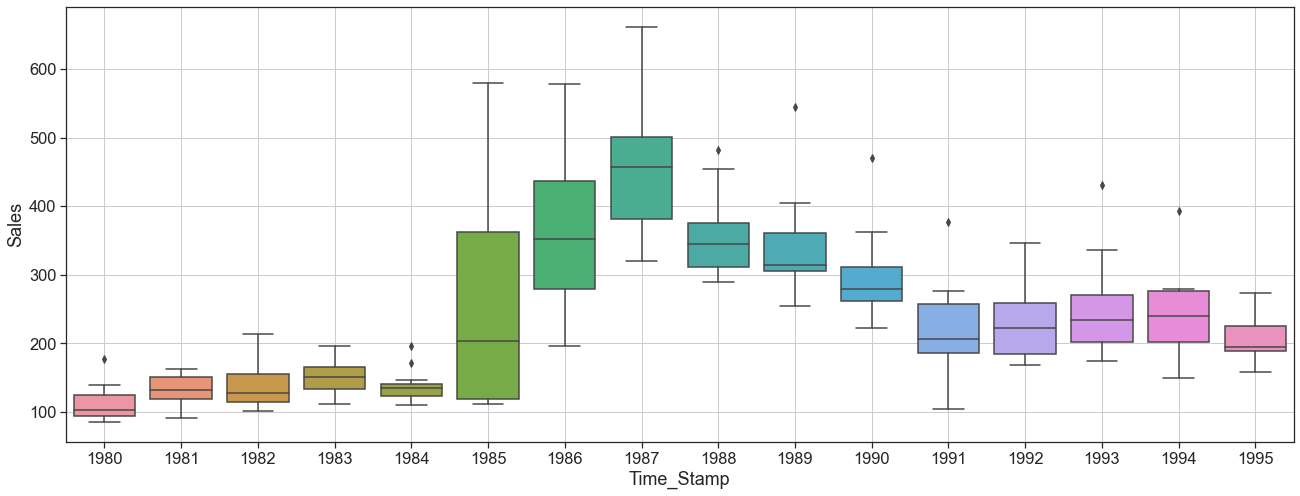

In [17]:
#Yearly Boxplot
fig,ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = shoe.index.year,y = shoe.values[:,0],ax=ax)
plt.ylabel('Sales')
plt.grid();

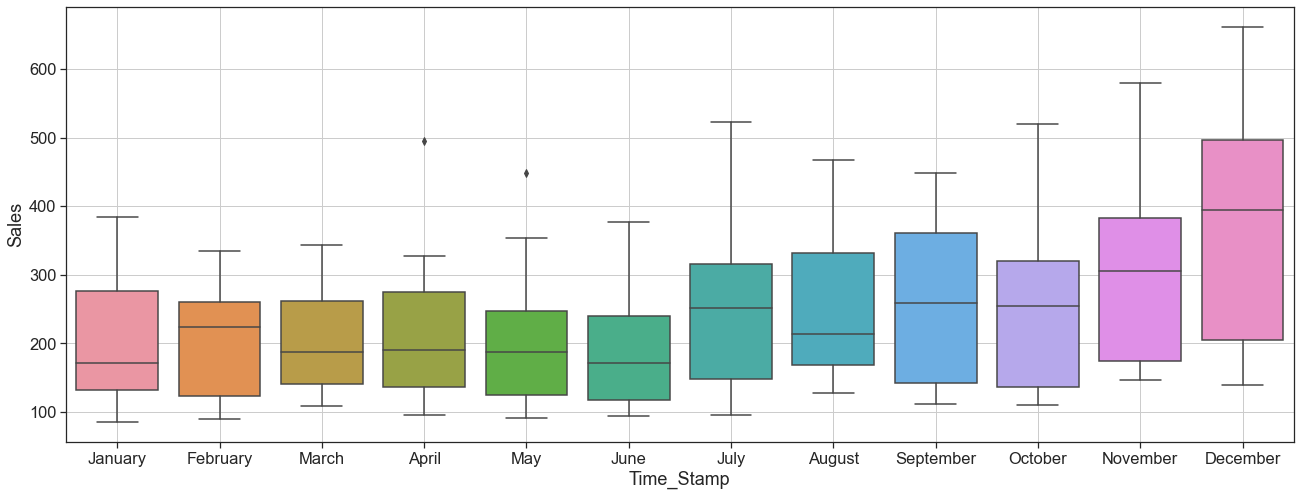

In [18]:
#Monthly Plot
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = shoe.index.month_name(),y = shoe.values[:,0],ax=ax)
plt.ylabel('Sales')
plt.grid();

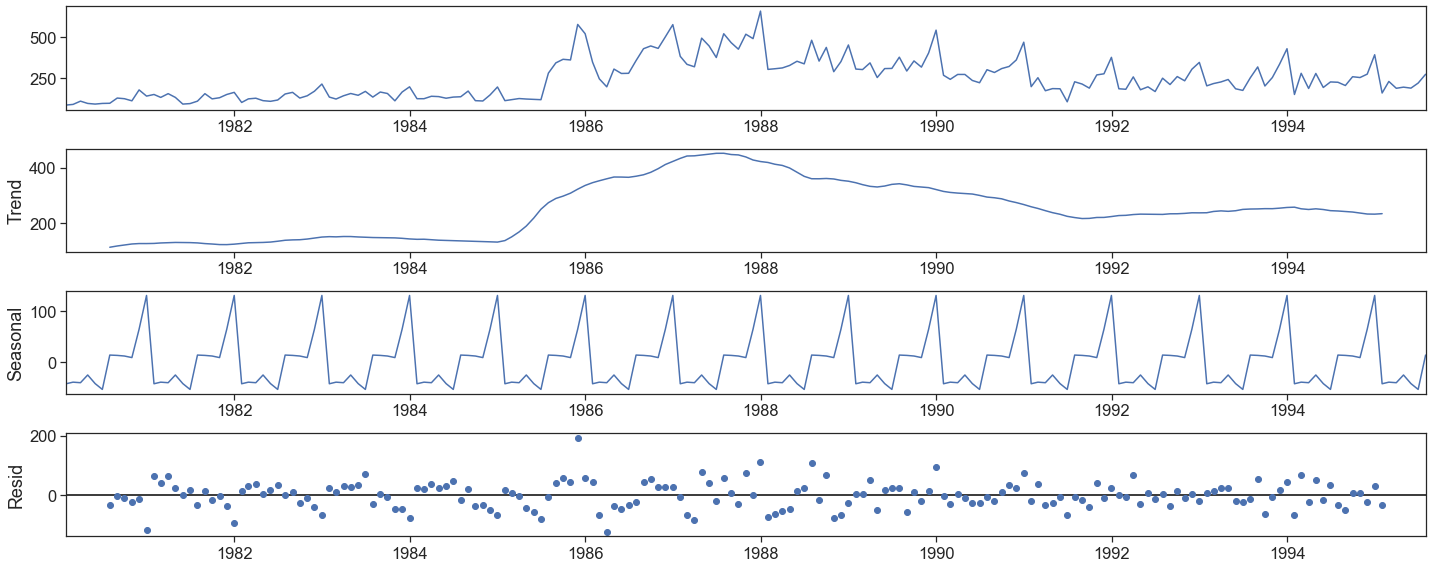

In [19]:
rcParams['figure.figsize'] = 20,8
decomposition = seasonal_decompose(shoe,model='additive')
decomposition.plot();

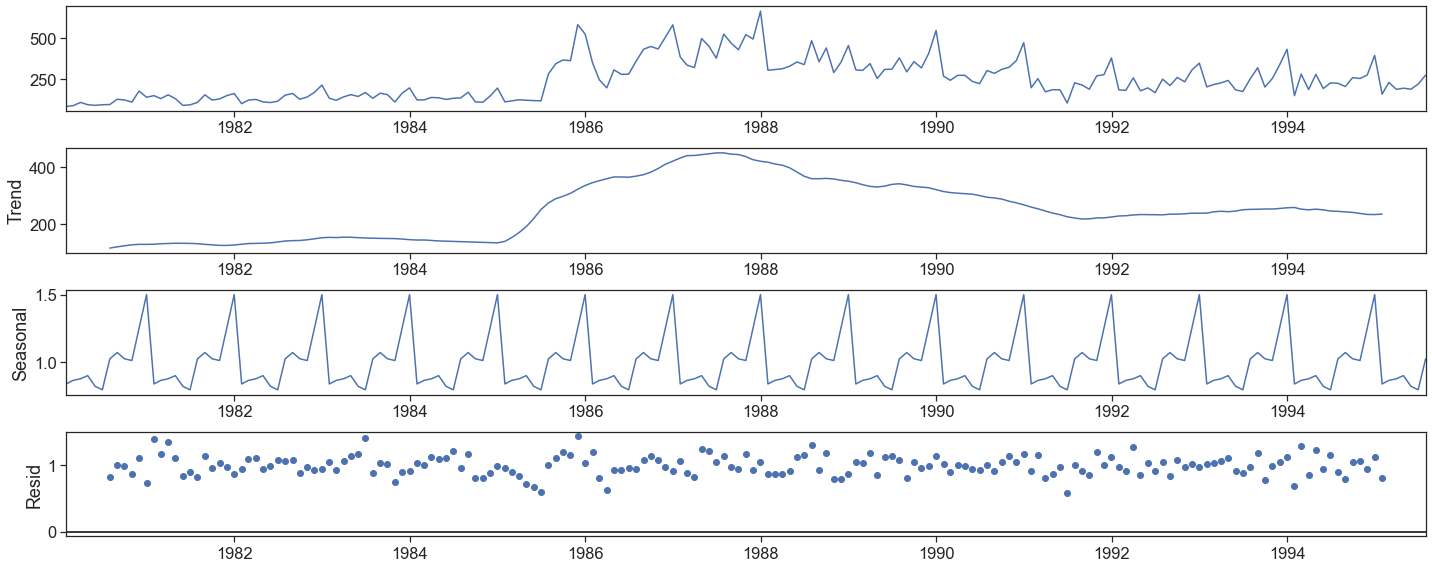

In [20]:
decomposition = seasonal_decompose(shoe,model='multiplicative')
rcParams['figure.figsize'] = 20,8
decomposition.plot();

In [21]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [22]:
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')
print('Trend','\n',trend.tail(12),'\n')
print('Seasonality','\n',seasonality.tail(12),'\n')
print('Residual','\n',residual.tail(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    114.458333
1980-08-31    118.958333
1980-09-30    122.666667
1980-10-31    126.125000
1980-11-30    127.666667
1980-12-31    127.625000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.840405
1980-02-29    0.866682
1980-03-31    0.878675
1980-04-30    0.901826
1980-05-31    0.823141
1980-06-30    0.797254
1980-07-31    1.025527
1980-08-31    1.072445
1980-09-30    1.026307
1980-10-31    1.013557
1980-11-30    1.254223
1980-12-31    1.499958
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.817856
1980-08-31    1.003322
1980-09-30    0.984958
1980-10-31    0.868308
1980-11-30    1.111649
1980-12-31    0.731330
Name: resid, dtype:

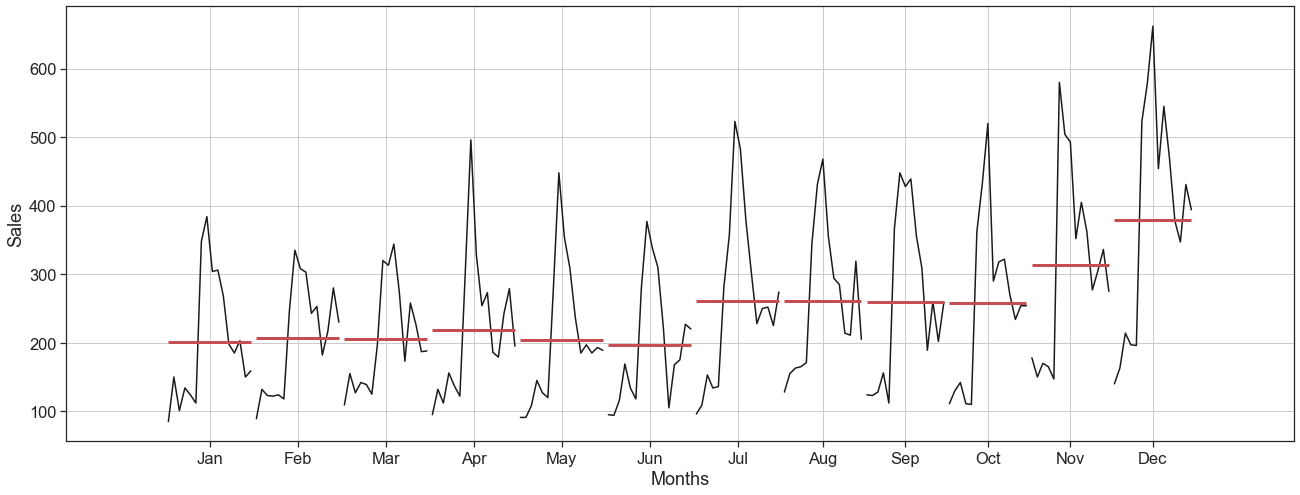

In [23]:
fig, ax = plt.subplots(figsize=(22,8))
month_plot(shoe,ax=ax)
plt.xlabel('Months')
plt.ylabel('Sales')
plt.grid();

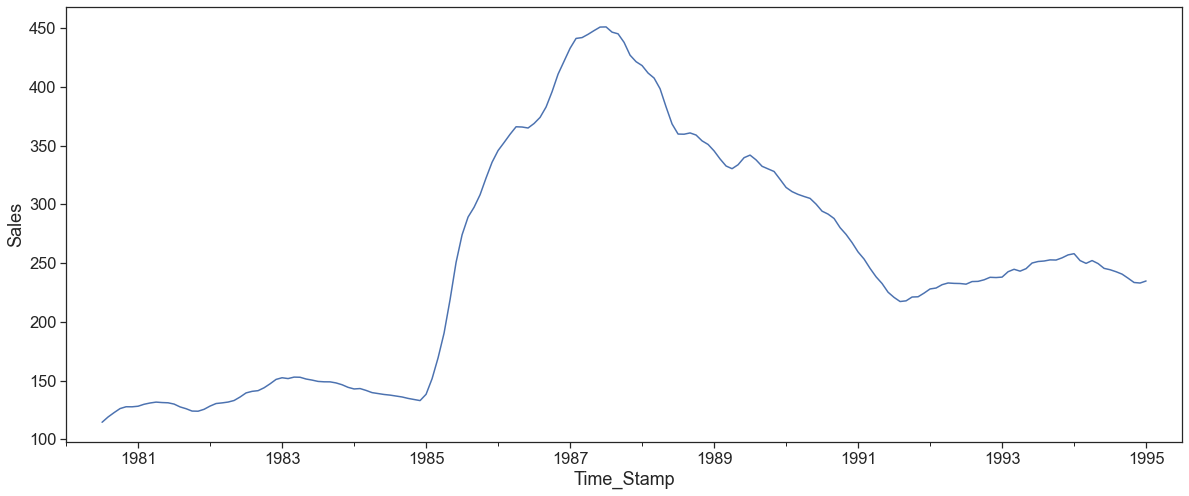

In [24]:
rcParams['figure.figsize'] = 20,8
plt.ylabel('Sales')
trend.plot();

In [25]:
#Split Data into training and test data
train=shoe[shoe.index.year < 1991]
test=shoe[shoe.index.year >= 1991]

In [26]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [27]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Shoe_Sales
Time_Stamp,
1980-01-31,85
1980-02-29,89
1980-03-31,109
1980-04-30,95
1980-05-31,91


Last few rows of Training Data


,Shoe_Sales
Time_Stamp,
1990-08-31,285
1990-09-30,309
1990-10-31,322
1990-11-30,362
1990-12-31,471


First few rows of Test Data


,Shoe_Sales
Time_Stamp,
1991-01-31,198
1991-02-28,253
1991-03-31,173
1991-04-30,186
1991-05-31,185


Last few rows of Test Data


,Shoe_Sales
Time_Stamp,
1995-03-31,188
1995-04-30,195
1995-05-31,189
1995-06-30,220
1995-07-31,274


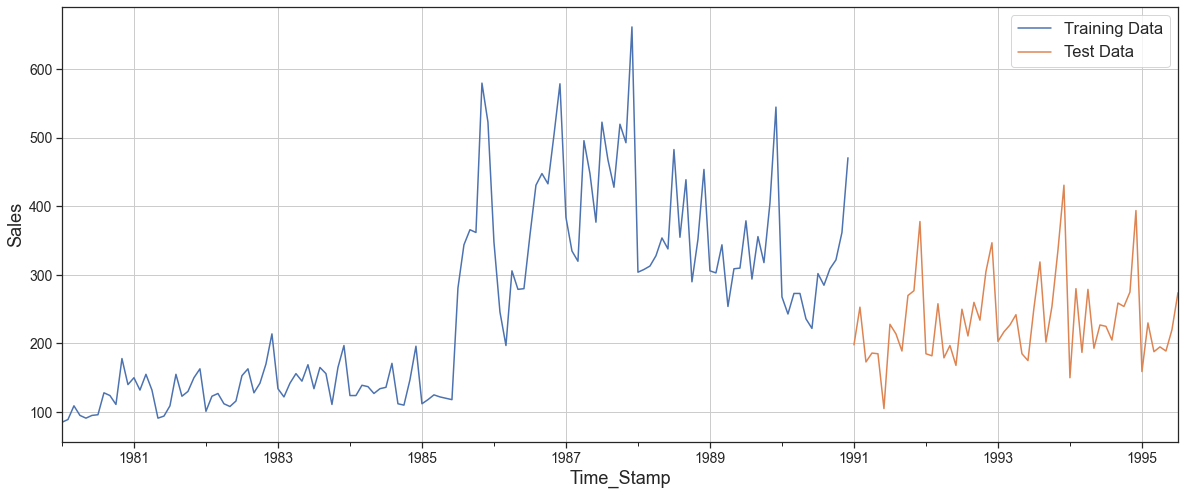

In [28]:
#Joint Plot of Train and Test Data
train['Shoe_Sales'].plot(figsize=(20,8), fontsize=14)
test['Shoe_Sales'].plot(figsize=(20,8), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.ylabel('Sales')
plt.show()

In [29]:
# Model 1: Linear Regression
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [30]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [31]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Shoe_Sales  time
Time_Stamp                  
1980-01-31          85     1
1980-02-29          89     2
1980-03-31         109     3
1980-04-30          95     4
1980-05-31          91     5 

Last few rows of Training Data 
             Shoe_Sales  time
Time_Stamp                  
1990-08-31         285   128
1990-09-30         309   129
1990-10-31         322   130
1990-11-30         362   131
1990-12-31         471   132 

First few rows of Test Data 
             Shoe_Sales  time
Time_Stamp                  
1991-01-31         198   133
1991-02-28         253   134
1991-03-31         173   135
1991-04-30         186   136
1991-05-31         185   137 

Last few rows of Test Data 
             Shoe_Sales  time
Time_Stamp                  
1995-03-31         188   183
1995-04-30         195   184
1995-05-31         189   185
1995-06-30         220   186
1995-07-31         274   187 



In [32]:
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Shoe_Sales'].values)

LinearRegression()

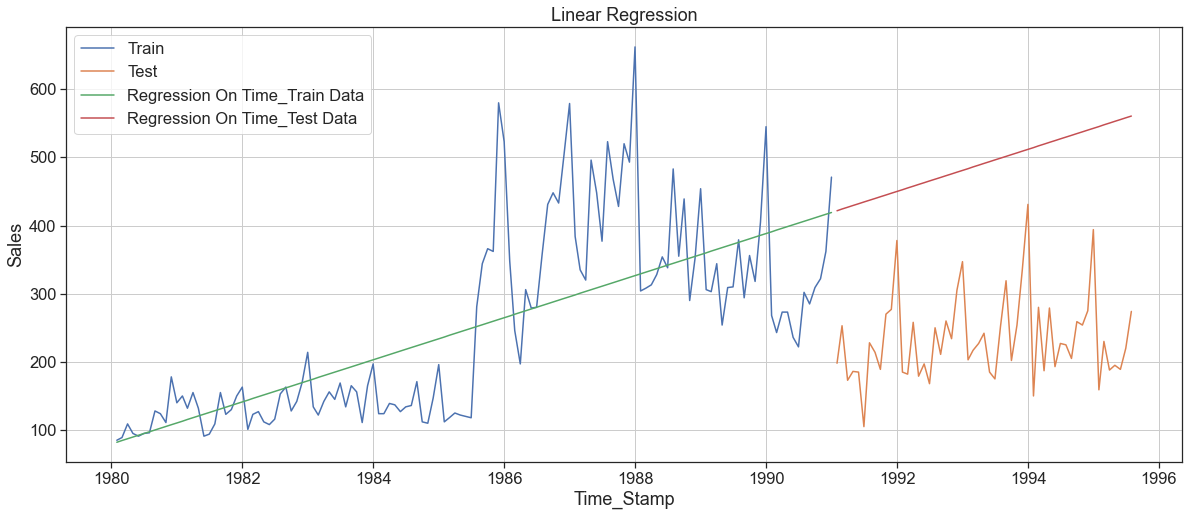

In [33]:
train_predictions_model1            = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1
test_predictions_model1             = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime']  = test_predictions_model1

plt.figure(figsize=(20,8))
plt.plot(train['Shoe_Sales'], label='Train')
plt.plot(test['Shoe_Sales'], label='Test')
plt.plot(LinearRegression_train['RegOnTime'], label='Regression On Time_Train Data')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.title("Linear Regression")
plt.xlabel("Time_Stamp")
plt.ylabel("Sales")
plt.grid();

In [34]:
#Model Evaluation
def MAPE(y, yhat):
    y, yhat = np.array(y),np.array(yhat)
    try:
        mape = round(np.sum(np.abs(yhat-y))/np.sum(y) * 100,2)
    except:
        print("Observed Values are empty")
        mape=np.nan
    return mape

In [35]:
import math
rmse = metrics.mean_squared_error(test['Shoe_Sales'],test_predictions_model1)
math.sqrt(rmse)

266.2764718475469

In [36]:
## Train Data - RMSE and MAPE
rmse_model1_train = metrics.mean_squared_error(train['Shoe_Sales'],train_predictions_model1,squared=False)
mape_model1_train = MAPE(train['Shoe_Sales'],train_predictions_model1)
mape_model1_train

28.5

In [37]:
## Test Data - RMSE
rmse_model1_test = metrics.mean_squared_error(test['Shoe_Sales'],test_predictions_model1,squared=False)
mape_model1_test = MAPE(test['Shoe_Sales'],test_predictions_model1)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))
print("For RegressionOnTime forecast on the Test Data,  MAPE is %3.3f" %(mape_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 266.276
For RegressionOnTime forecast on the Test Data,  MAPE is 110.080


In [38]:
results = pd.DataFrame({'Train RMSE': [rmse_model1_train],'Test RMSE': [rmse_model1_test],
                        'Train MAPE': [mape_model1_train],'Test MAPE': [mape_model1_test]},
                       index=['RegressionOnTime'])
results

,Train RMSE,Test RMSE,Train MAPE,Test MAPE
RegressionOnTime,97.380472,266.276472,28.5,110.08


In [39]:
#Model 2: Naive Approach
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [40]:
NaiveModel_train['naive'] = np.asarray(train['Shoe_Sales'])[len(np.asarray(train['Shoe_Sales']))-1]
display(NaiveModel_train['naive'].head())
NaiveModel_test['naive'] = np.asarray(test['Shoe_Sales'])[len(np.asarray(test['Shoe_Sales']))-1]
display(NaiveModel_test['naive'].head())

Time_Stamp
1980-01-31    471
1980-02-29    471
1980-03-31    471
1980-04-30    471
1980-05-31    471
Name: naive, dtype: int64

Time_Stamp
1991-01-31    274
1991-02-28    274
1991-03-31    274
1991-04-30    274
1991-05-31    274
Name: naive, dtype: int64

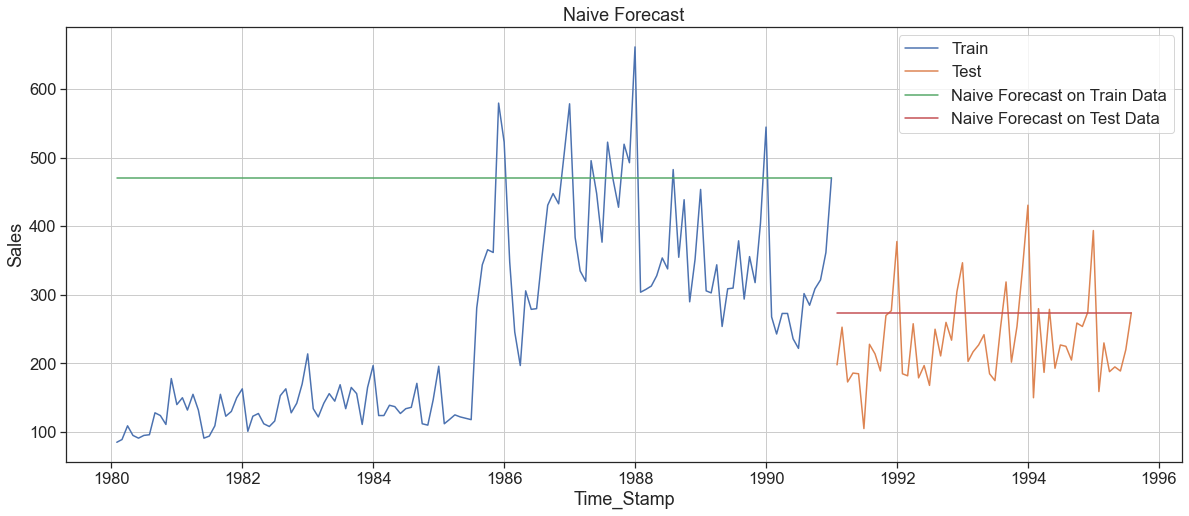

In [41]:
plt.figure(figsize=(20,8))
plt.plot(NaiveModel_train['Shoe_Sales'], label='Train')
plt.plot(test['Shoe_Sales'], label='Test')
plt.plot(NaiveModel_train['naive'], label='Naive Forecast on Train Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.xlabel("Time_Stamp")
plt.ylabel("Sales")
plt.grid();

In [42]:
## Train Data - RMSE and MAPE

rmse_model2_train = metrics.mean_squared_error(train['Shoe_Sales'],NaiveModel_train['naive'],squared=False)
mape_model2_train = MAPE(train['Shoe_Sales'],NaiveModel_train['naive'])
rmse_model2_train, mape_model2_train

(260.15292705358024, 92.36)

In [43]:
## Test Data - RMSE and MAPE

rmse_model2_test = metrics.mean_squared_error(test['Shoe_Sales'],NaiveModel_test['naive'],squared=False)
mape_model2_test = MAPE(test['Shoe_Sales'],NaiveModel_test['naive'])
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))
print("For RegressionOnTime forecast on the Test Data,  MAPE is %3.3f" %(mape_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 73.685
For RegressionOnTime forecast on the Test Data,  MAPE is 26.640


In [44]:
resultsDf_2 = pd.DataFrame({'Train RMSE': [rmse_model2_train],'Test RMSE': [rmse_model2_test],
                            'Train MAPE': [mape_model2_train],'Test MAPE': [mape_model2_test]}
                           ,index=['NaiveModel'])

results = pd.concat([results, resultsDf_2])
results

,Train RMSE,Test RMSE,Train MAPE,Test MAPE
RegressionOnTime,97.380472,266.276472,28.50,110.08
NaiveModel,260.152927,73.685079,92.36,26.64


In [45]:
#Simple Average
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [46]:
SimpleAverage_train['mean_forecast'] = train['Shoe_Sales'].mean()
display(SimpleAverage_train.head())
SimpleAverage_test['mean_forecast'] = train['Shoe_Sales'].mean()
display(SimpleAverage_test.head())

,Shoe_Sales,mean_forecast
Time_Stamp,,
1980-01-31,85,250.575758
1980-02-29,89,250.575758
1980-03-31,109,250.575758
1980-04-30,95,250.575758
1980-05-31,91,250.575758


,Shoe_Sales,mean_forecast
Time_Stamp,,
1991-01-31,198,250.575758
1991-02-28,253,250.575758
1991-03-31,173,250.575758
1991-04-30,186,250.575758
1991-05-31,185,250.575758


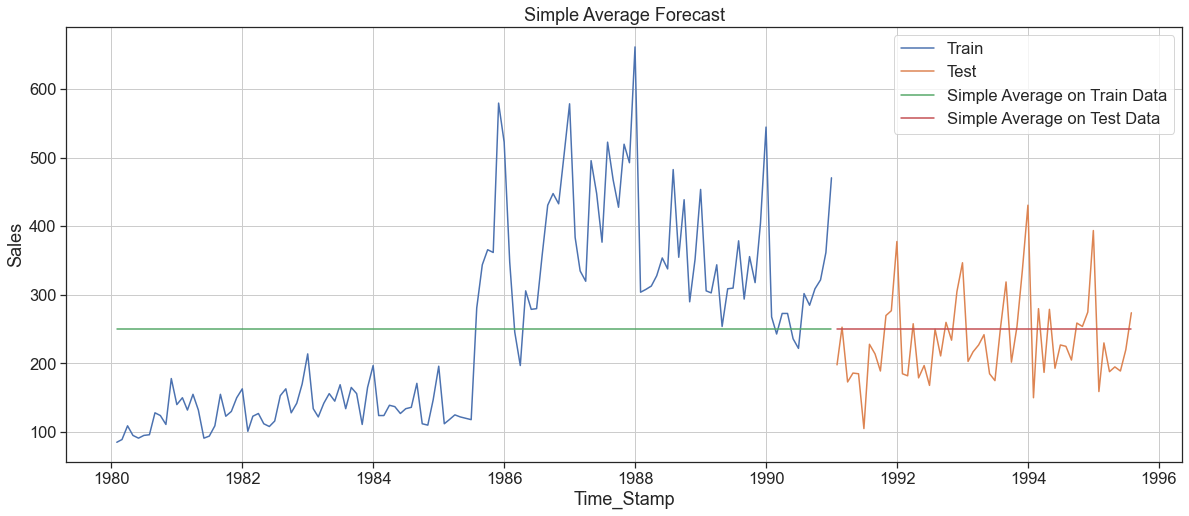

In [47]:
plt.figure(figsize=(20,8))
plt.plot(SimpleAverage_train['Shoe_Sales'], label='Train')
plt.plot(SimpleAverage_test['Shoe_Sales'], label='Test')
plt.plot(SimpleAverage_train['mean_forecast'], label='Simple Average on Train Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.xlabel("Time_Stamp")
plt.ylabel("Sales")
plt.grid();

In [48]:
## Train and Test Data - RMSE  and MAPE

rmse_model3_train = metrics.mean_squared_error(train['Shoe_Sales'],SimpleAverage_train['mean_forecast'],squared=False)
mape_model3_train = MAPE(train['Shoe_Sales'],SimpleAverage_train['mean_forecast'])
rmse_model3_test = metrics.mean_squared_error(test['Shoe_Sales'],SimpleAverage_test['mean_forecast'],squared=False)
mape_model3_test = MAPE(test['Shoe_Sales'],SimpleAverage_test['mean_forecast'])

In [49]:
resultsDf_3 = pd.DataFrame({'Train RMSE': [rmse_model3_train],'Test RMSE': [rmse_model3_test],
                            'Train MAPE': [mape_model3_train],'Test MAPE': [mape_model3_test]}
                           ,index=['SimpleAverageModel'])

results = pd.concat([results, resultsDf_3])
results

,Train RMSE,Test RMSE,Train MAPE,Test MAPE
RegressionOnTime,97.380472,266.276472,28.50,110.08
NaiveModel,260.152927,73.685079,92.36,26.64
SimpleAverageModel,138.176332,63.984570,47.75,21.86


In [50]:
#Moving Average
MovingAverage = shoe.copy()
MovingAverage.head()

,Shoe_Sales
Time_Stamp,
1980-01-31,85
1980-02-29,89
1980-03-31,109
1980-04-30,95
1980-05-31,91


In [51]:
MovingAverage['Trailing_2'] = MovingAverage['Shoe_Sales'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Shoe_Sales'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Shoe_Sales'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Shoe_Sales'].rolling(9).mean()
MovingAverage.head(10)

,Shoe_Sales,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_Stamp,,,,,
1980-01-31,85,NaN,NaN,NaN,NaN
1980-02-29,89,87.0,NaN,NaN,NaN
1980-03-31,109,99.0,NaN,NaN,NaN
1980-04-30,95,102.0,94.50,NaN,NaN
1980-05-31,91,93.0,96.00,NaN,NaN
1980-06-30,95,93.0,97.50,94.000000,NaN
1980-07-31,96,95.5,94.25,95.833333,NaN
1980-08-31,128,112.0,102.50,102.333333,NaN
1980-09-30,124,126.0,110.75,104.833333,101.333333


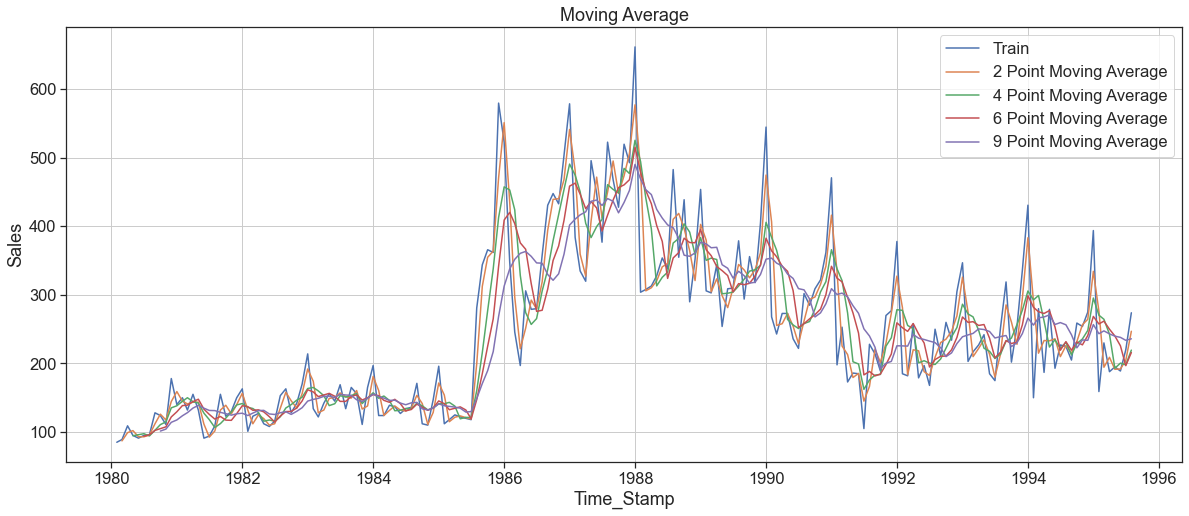

In [52]:
plt.figure(figsize=(20,8))
plt.plot(MovingAverage['Shoe_Sales'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'], label='6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'], label='9 Point Moving Average')

plt.legend(loc = 'best')
plt.title("Moving Average")
plt.xlabel("Time_Stamp")
plt.ylabel("Sales")
plt.grid();

In [53]:
trailing_MovingAverage_train=MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test=MovingAverage[MovingAverage.index.year >= 1991]

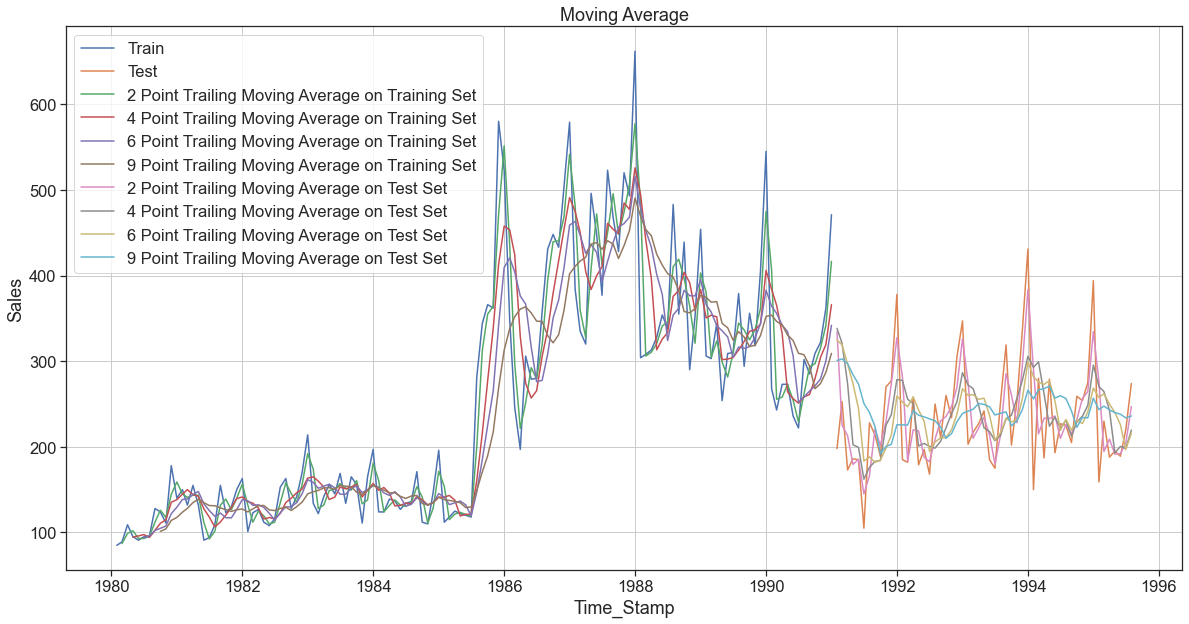

In [54]:
plt.figure(figsize=(20,10))
plt.plot(trailing_MovingAverage_train['Shoe_Sales'], label='Train')
plt.plot(trailing_MovingAverage_test['Shoe_Sales'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label = '2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label = '4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'], label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'], label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label = '2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label = '4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'], label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'], label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.title("Moving Average")
plt.xlabel("Time_Stamp")
plt.ylabel("Sales")
plt.grid();

In [55]:
train['Shoe_Sales']

Time_Stamp
1980-01-31     85
1980-02-29     89
1980-03-31    109
1980-04-30     95
1980-05-31     91
             ... 
1990-08-31    285
1990-09-30    309
1990-10-31    322
1990-11-30    362
1990-12-31    471
Name: Shoe_Sales, Length: 132, dtype: int64

In [56]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Shoe_Sales'],trailing_MovingAverage_test['Trailing_2'],squared=False)
mape_model4_test_2 = MAPE(test['Shoe_Sales'],trailing_MovingAverage_test['Trailing_2'])
print("For 2 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f" %(rmse_model4_test_2))
print("For 2 point Moving Average Model forecast on the Testing Data,  MAPE is %3.3f" %(mape_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA


rmse_model4_test_4 = metrics.mean_squared_error(test['Shoe_Sales'],trailing_MovingAverage_test['Trailing_4'],squared=False)
mape_model4_test_4 = MAPE(test['Shoe_Sales'],trailing_MovingAverage_test['Trailing_4'])
print("For 4 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f" %(rmse_model4_test_4))
print("For 4 point Moving Average Model forecast on the Testing Data,  MAPE is %3.3f" %(mape_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA


rmse_model4_test_6 = metrics.mean_squared_error(test['Shoe_Sales'],trailing_MovingAverage_test['Trailing_6'],squared=False)
mape_model4_test_6 = MAPE(test['Shoe_Sales'],trailing_MovingAverage_test['Trailing_6'])
print("For 6 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f" %(rmse_model4_test_6))
print("For 6 point Moving Average Model forecast on the Testing Data,  MAPE is %3.3f" %(mape_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA


rmse_model4_test_9 = metrics.mean_squared_error(test['Shoe_Sales'],trailing_MovingAverage_test['Trailing_9'],squared=False)
mape_model4_test_9 = MAPE(test['Shoe_Sales'],trailing_MovingAverage_test['Trailing_9'])
print("For 9 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f " %(rmse_model4_test_9))
print("For 9 point Moving Average Model forecast on the Testing Data,  MAPE is %3.3f" %(mape_model4_test_9))

For 2 point Moving Average Model forecast on the Testing Data,  RMSE is 45.949
For 2 point Moving Average Model forecast on the Testing Data,  MAPE is 14.320
For 4 point Moving Average Model forecast on the Testing Data,  RMSE is 57.873
For 4 point Moving Average Model forecast on the Testing Data,  MAPE is 19.480
For 6 point Moving Average Model forecast on the Testing Data,  RMSE is 63.457
For 6 point Moving Average Model forecast on the Testing Data,  MAPE is 22.380
For 9 point Moving Average Model forecast on the Testing Data,  RMSE is 67.724 
For 9 point Moving Average Model forecast on the Testing Data,  MAPE is 23.330


In [57]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9],
                            'Test MAPE': [mape_model4_test_2,mape_model4_test_4
                                          ,mape_model4_test_6,mape_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

results = pd.concat([results, resultsDf_4])
results

,Train RMSE,Test RMSE,Train MAPE,Test MAPE
RegressionOnTime,97.380472,266.276472,28.50,110.08
NaiveModel,260.152927,73.685079,92.36,26.64
SimpleAverageModel,138.176332,63.984570,47.75,21.86
2pointTrailingMovingAverage,NaN,45.948736,NaN,14.32
4pointTrailingMovingAverage,NaN,57.872686,NaN,19.48
6pointTrailingMovingAverage,NaN,63.456893,NaN,22.38
9pointTrailingMovingAverage,NaN,67.723648,NaN,23.33


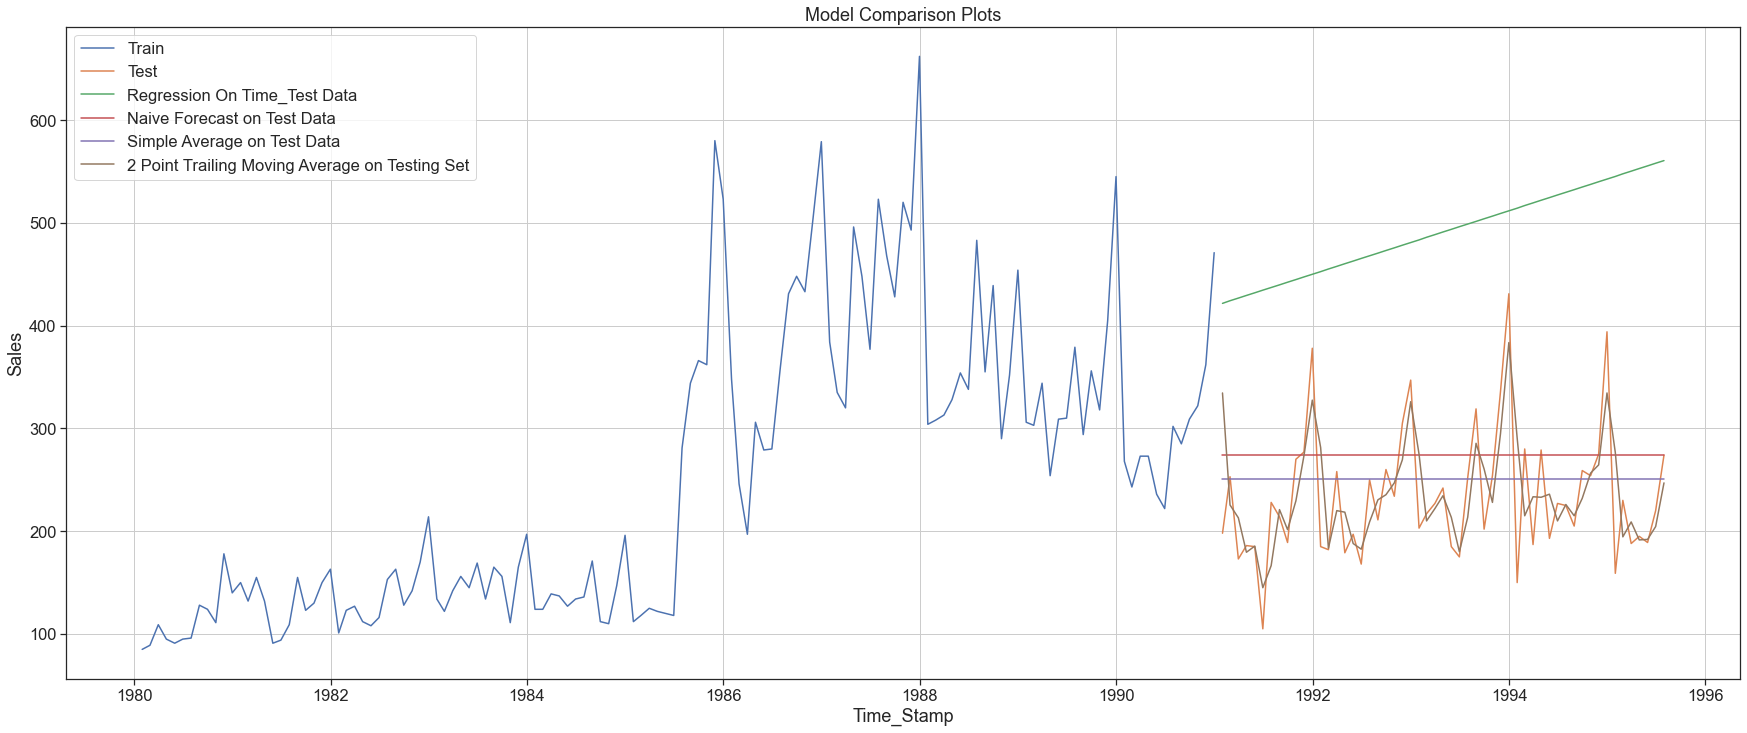

In [58]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Shoe_Sales'], label='Train')
plt.plot(test['Shoe_Sales'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Testing Set')

plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.xlabel("Time_Stamp")
plt.ylabel("Sales")
plt.grid();

In [59]:
#Simple Exponential Smoothing
SES_train = train.copy()
SES_test = test.copy()

In [60]:
model_SES = SimpleExpSmoothing(SES_train['Shoe_Sales'])

In [61]:
model_SES_autofit = model_SES.fit(optimized=True)
model_SES_autofit.params

{'smoothing_level': 0.60504929557062,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 88.82937100904118,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [62]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,Shoe_Sales,predict
Time_Stamp,,
1991-01-31,198,420.229868
1991-02-28,253,420.229868
1991-03-31,173,420.229868
1991-04-30,186,420.229868
1991-05-31,185,420.229868


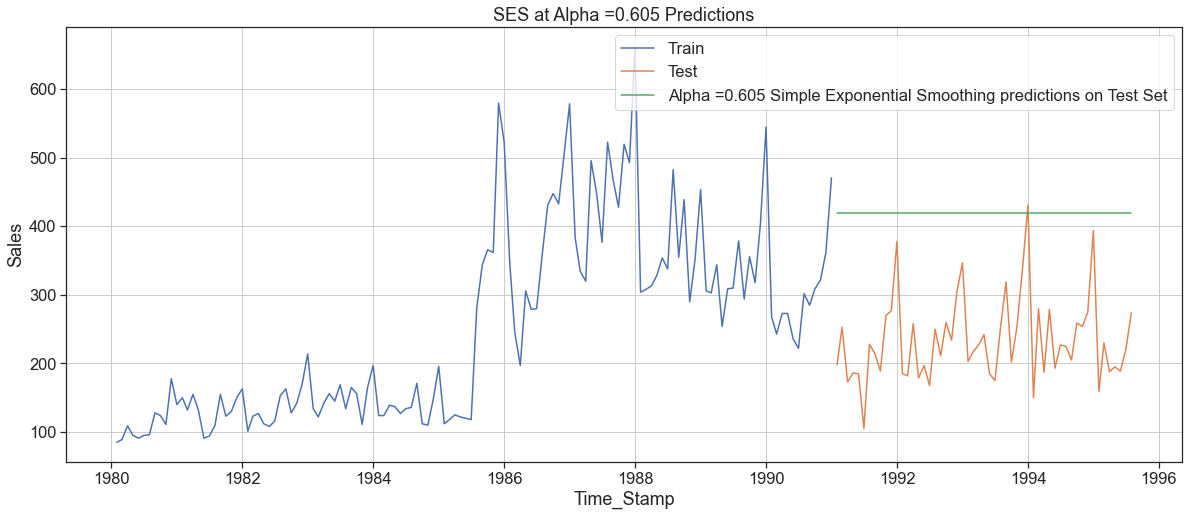

In [63]:
plt.figure(figsize=(20,8))
plt.plot(SES_train['Shoe_Sales'], label='Train')
plt.plot(SES_test['Shoe_Sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.605 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('SES at Alpha =0.605 Predictions')
plt.xlabel("Time_Stamp")
plt.ylabel("Sales");

In [64]:
rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Shoe_Sales'],SES_test['predict'],squared=False)
mape_model5_test_1 = MAPE(SES_test['Shoe_Sales'],SES_test['predict'])
print("For Alpha =0.605 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))
print("For Alpha =0.605 Simple Exponential Smoothing Model forecast on the Test Data, MAPE is %3.3f" %(mape_model5_test_1))

For Alpha =0.605 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 196.405
For Alpha =0.605 Simple Exponential Smoothing Model forecast on the Test Data, MAPE is 79.920


In [65]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1],'Test MAPE': [mape_model5_test_1]},
                           index=['Alpha=0.605,SimpleExponentialSmoothing'])

results1 = pd.concat([results['Test RMSE'], resultsDf_5['Test RMSE']])
results1

RegressionOnTime                          266.276472
NaiveModel                                 73.685079
SimpleAverageModel                         63.984570
2pointTrailingMovingAverage                45.948736
4pointTrailingMovingAverage                57.872686
6pointTrailingMovingAverage                63.456893
9pointTrailingMovingAverage                67.723648
Alpha=0.605,SimpleExponentialSmoothing    196.404847
Name: Test RMSE, dtype: float64

In [66]:
resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Train MAPE':[],'Test RMSE': [],'Test MAPE': []})
for i in np.arange(0.1,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=55)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Shoe_Sales'],SES_train['predict',i],squared=False)
    mape_model5_train_i = MAPE(SES_train['Shoe_Sales'],SES_train['predict',i])
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Shoe_Sales'],SES_test['predict',i],squared=False)
    mape_model5_test_i = MAPE(SES_test['Shoe_Sales'],SES_test['predict',i])
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Train MAPE':mape_model5_train_i
                                      ,'Test RMSE':rmse_model5_test_i
                                      ,'Test MAPE':mape_model5_test_i }, ignore_index=True)

In [67]:
resultsDf_6.sort_values(by=['Test RMSE'])

,Alpha Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.1,85.052470,22.73,115.874445,45.47
1,0.2,77.208198,21.10,124.976820,49.28
2,0.3,74.555356,20.50,143.400350,57.13
3,0.4,73.062722,19.92,162.553211,65.20
4,0.5,72.200617,19.50,180.072484,72.79
5,0.6,71.902349,19.18,195.663327,79.60
6,0.7,72.131707,19.01,209.658339,85.70
7,0.8,72.846955,19.15,222.417584,91.40
8,0.9,74.023429,19.34,234.188166,96.63


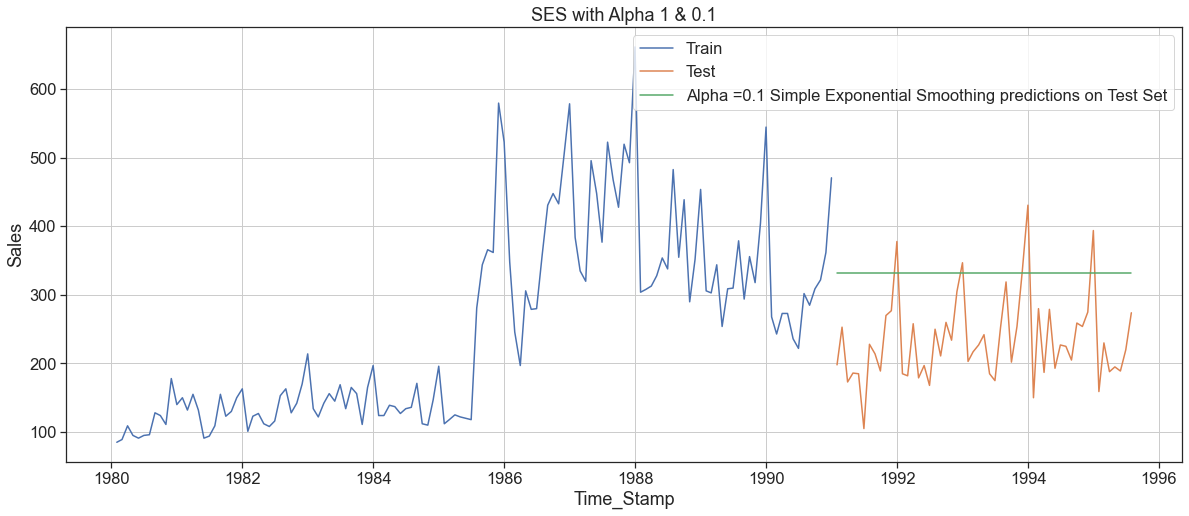

In [68]:
plt.figure(figsize=(20,8))
plt.plot(SES_train['Shoe_Sales'], label='Train')
plt.plot(SES_test['Shoe_Sales'], label='Test')

plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.title("SES with Alpha 1 & 0.1")
plt.xlabel("Time_Stamp")
plt.ylabel("Sales")
plt.grid();

In [69]:
resultsDf_6_1 = pd.DataFrame({'Train RMSE': [resultsDf_6['Train RMSE'][0]],
                              'Test RMSE': [resultsDf_6['Test RMSE'][0]],
                              'Train MAPE': [resultsDf_6['Train MAPE'][0]],
                              'Test MAPE': [resultsDf_6['Test MAPE'][0]]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing'])

results = pd.concat([results, resultsDf_6_1])
results

,Train RMSE,Test RMSE,Train MAPE,Test MAPE
RegressionOnTime,97.380472,266.276472,28.50,110.08
NaiveModel,260.152927,73.685079,92.36,26.64
SimpleAverageModel,138.176332,63.984570,47.75,21.86
2pointTrailingMovingAverage,NaN,45.948736,NaN,14.32
4pointTrailingMovingAverage,NaN,57.872686,NaN,19.48
6pointTrailingMovingAverage,NaN,63.456893,NaN,22.38
9pointTrailingMovingAverage,NaN,67.723648,NaN,23.33
"Alpha=0.1,SimpleExponentialSmoothing",85.052470,115.874445,22.73,45.47


In [70]:
#Double Exponential Smoothing
DES_train = train.copy()
DES_test = test.copy()

In [71]:
model_DES = Holt(DES_train['Shoe_Sales'])

In [72]:
model_DES_autofit = model_DES.fit(optimized=True)
model_DES_autofit.params

{'smoothing_level': 0.5982578090725877,
 'smoothing_trend': 0.0006280517966471728,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 84.98234638443539,
 'initial_trend': 2.547436706121743,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [73]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test))
DES_test.head()

,Shoe_Sales,predict
Time_Stamp,,
1991-01-31,198,423.398462
1991-02-28,253,425.945842
1991-03-31,173,428.493222
1991-04-30,186,431.040601
1991-05-31,185,433.587981


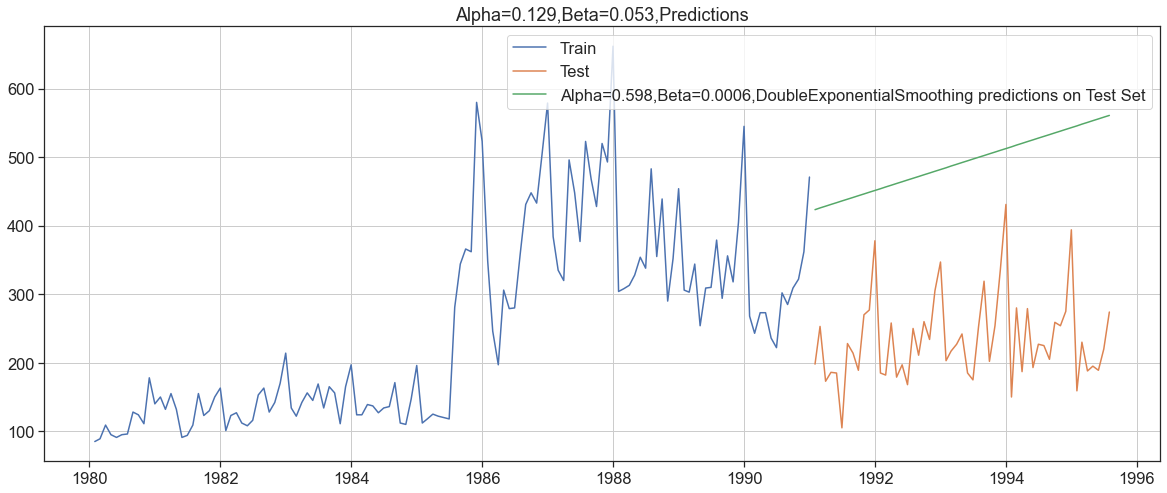

In [74]:
plt.figure(figsize=(20,8))
plt.plot(DES_train['Shoe_Sales'], label='Train')
plt.plot(DES_test['Shoe_Sales'], label='Test')

plt.plot(DES_test['predict'], label='Alpha=0.598,Beta=0.0006,DoubleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha=0.129,Beta=0.053,Predictions');

In [75]:
resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': [],'Train MAPE':[],
                            'Test MAPE':[]})
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Shoe_Sales'],DES_train['predict',i,j],squared=False)
        mape_model6_train = MAPE(DES_train['Shoe_Sales'],DES_train['predict',i,j])
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Shoe_Sales'],DES_test['predict',i,j],squared=False)
        mape_model6_test = MAPE(DES_test['Shoe_Sales'],DES_test['predict',i,j])
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,
                                          'Train RMSE':rmse_model6_train,
                                          'Test RMSE':rmse_model6_test,
                                          'Train MAPE':mape_model6_train,
                                          'Test MAPE':mape_model6_test}, ignore_index=True)

In [76]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE,Train MAPE,Test MAPE
0,0.1,0.1,86.865434,76.918569,23.20,25.25
10,0.2,0.1,79.176724,163.808796,21.64,65.22
1,0.1,0.2,84.467230,209.844048,22.20,82.51
2,0.1,0.3,84.311322,225.024262,22.19,88.85
3,0.1,0.4,86.219612,229.367329,22.90,90.12


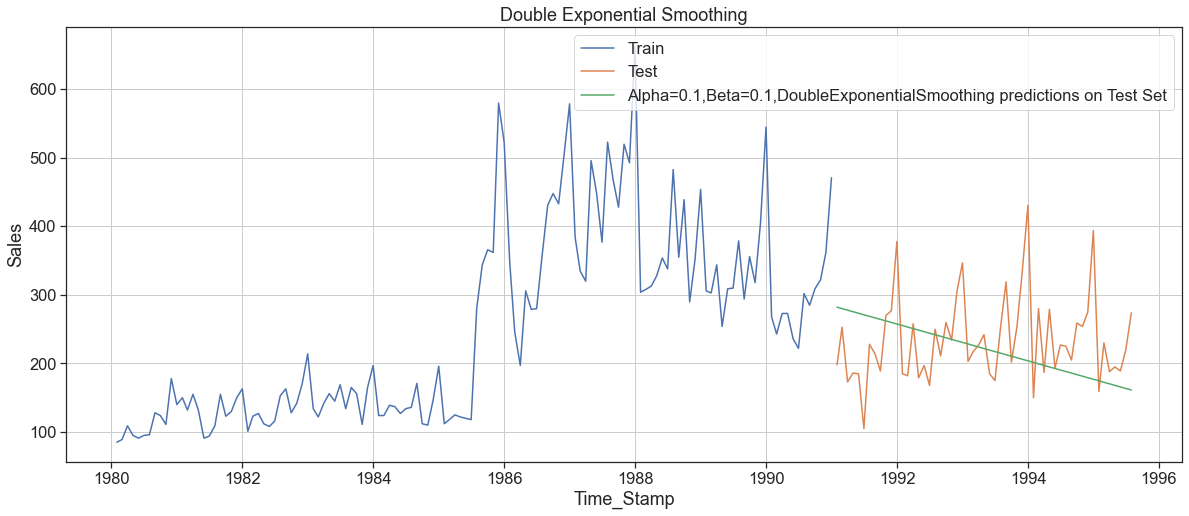

In [77]:
plt.figure(figsize=(20,8))
plt.plot(DES_train['Shoe_Sales'], label='Train')
plt.plot(DES_test['Shoe_Sales'], label='Test')

plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')
plt.title("Double Exponential Smoothing")
plt.xlabel("Time_Stamp")
plt.ylabel("Sales")
plt.legend(loc='best')
plt.grid();

In [78]:
resultsDf_7_1 = pd.DataFrame({'Train RMSE': [resultsDf_7['Train RMSE'][0]],
                              'Test RMSE': [resultsDf_7['Test RMSE'][0]],
                              'Train MAPE': [resultsDf_7['Train MAPE'][0]],
                              'Test MAPE': [resultsDf_7['Test MAPE'][0]]}
                           ,index=['Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing'])

results = pd.concat([results, resultsDf_7_1])
results

,Train RMSE,Test RMSE,Train MAPE,Test MAPE
RegressionOnTime,97.380472,266.276472,28.50,110.08
NaiveModel,260.152927,73.685079,92.36,26.64
SimpleAverageModel,138.176332,63.984570,47.75,21.86
2pointTrailingMovingAverage,NaN,45.948736,NaN,14.32
4pointTrailingMovingAverage,NaN,57.872686,NaN,19.48
6pointTrailingMovingAverage,NaN,63.456893,NaN,22.38
9pointTrailingMovingAverage,NaN,67.723648,NaN,23.33
"Alpha=0.1,SimpleExponentialSmoothing",85.052470,115.874445,22.73,45.47
"Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing",86.865434,76.918569,23.20,25.25


In [79]:
#Triple Exponential Smoothing (Holt - Winter's Model)
TES_train = train.copy()
TES_test = test.copy()

In [80]:
model_TES = ExponentialSmoothing(TES_train['Shoe_Sales'],trend='additive',seasonal='additive',freq='M')

In [81]:
model_TES_autofit = model_TES.fit()
model_TES_autofit.params

{'smoothing_level': 0.5707142857142857,
 'smoothing_trend': 0.0001,
 'smoothing_seasonal': 0.29372180451127816,
 'damping_trend': nan,
 'initial_level': 116.47499999999991,
 'initial_trend': 1.6939393939394,
 'initial_seasons': array([-11.20138889, -14.06597222,   1.11111111,  -5.25347222,
        -21.42013889, -11.18055556, -10.83680556,  18.14236111,
         -2.53472222, -12.53472222,  28.90277778,  40.87152778]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [82]:
TES_train['auto_predict'] = model_TES_autofit.fittedvalues
TES_train.head()

,Shoe_Sales,auto_predict
Time_Stamp,,
1980-01-31,85,106.967551
1980-02-29,89,93.258458
1980-03-31,109,107.697621
1980-04-30,95,103.768841
1980-05-31,91,84.289688


In [83]:
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

,Shoe_Sales,auto_predict
Time_Stamp,,
1991-01-31,198,219.083658
1991-02-28,253,213.816321
1991-03-31,173,246.658224
1991-04-30,186,267.260236
1991-05-31,185,287.719744


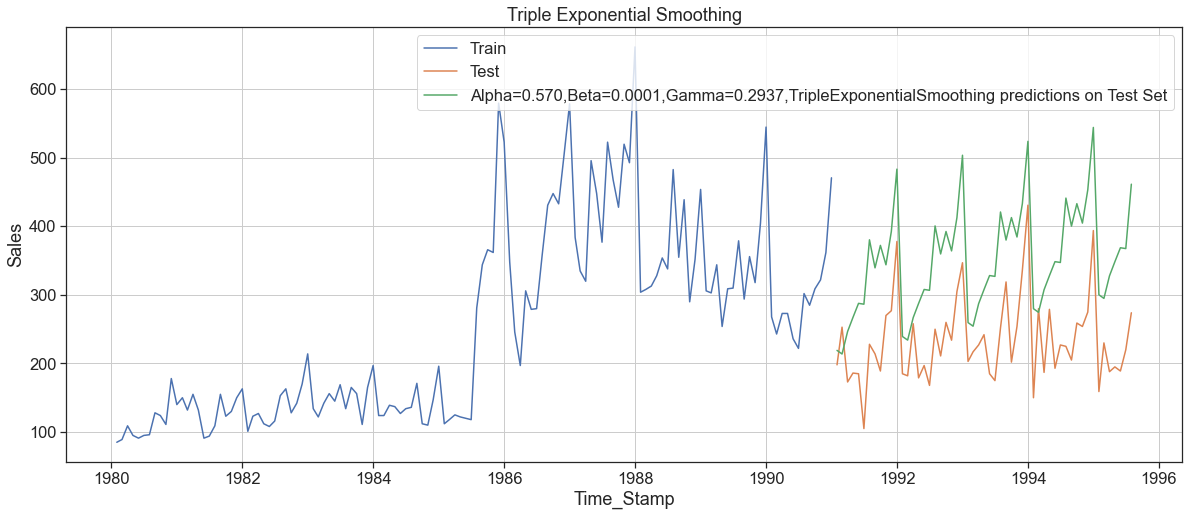

In [84]:
plt.figure(figsize=(20,8))
plt.plot(TES_train['Shoe_Sales'], label='Train')
plt.plot(TES_test['Shoe_Sales'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.570,Beta=0.0001,Gamma=0.2937,TripleExponentialSmoothing predictions on Test Set')
plt.title("Triple Exponential Smoothing")
plt.xlabel("Time_Stamp")
plt.ylabel("Sales")
plt.legend(loc='best')
plt.grid();

In [85]:
rmse_model8_train_1=metrics.mean_squared_error(TES_train['Shoe_Sales'],TES_train['auto_predict'],squared=False)
mape_model8_train_1=MAPE(TES_train['Shoe_Sales'],TES_train['auto_predict'])
rmse_model8_test_1=metrics.mean_squared_error(TES_test['Shoe_Sales'],TES_test['auto_predict'],squared=False)
mape_model8_test_1=MAPE(TES_test['Shoe_Sales'],TES_test['auto_predict'])
print("For Alpha=0.570,Beta=0.0001,Gamma=0.2937, Triple Exponential Smoothing Model forecast on the Train Data,  RMSE is %3.3f" %(rmse_model8_train_1))
print("For Alpha=0.570,Beta=0.0001,Gamma=0.2937, Triple Exponential Smoothing Model forecast on the Train Data,  MAPE is %3.3f" %(mape_model8_train_1))
print("For Alpha=0.570,Beta=0.0001,Gamma=0.2937, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model8_test_1))
print("For Alpha=0.570,Beta=0.0001,Gamma=0.2937, Triple Exponential Smoothing Model forecast on the Test Data,  MAPE is %3.3f" %(mape_model8_test_1))

For Alpha=0.570,Beta=0.0001,Gamma=0.2937, Triple Exponential Smoothing Model forecast on the Train Data,  RMSE is 54.044
For Alpha=0.570,Beta=0.0001,Gamma=0.2937, Triple Exponential Smoothing Model forecast on the Train Data,  MAPE is 14.460
For Alpha=0.570,Beta=0.0001,Gamma=0.2937, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 128.993
For Alpha=0.570,Beta=0.0001,Gamma=0.2937, Triple Exponential Smoothing Model forecast on the Test Data,  MAPE is 50.530


In [86]:
resultsDf_8_1 = pd.DataFrame({'Train RMSE': [rmse_model8_train_1],
                              'Test RMSE': [rmse_model8_test_1],
                              'Train MAPE': [mape_model8_train_1],
                              'Test MAPE': [mape_model8_test_1]}
                           ,index=['Alpha=0.570,Beta=0.0001,Gamma=0.2937,TripleExponentialSmoothing'])

results = pd.concat([results, resultsDf_8_1])
results

,Train RMSE,Test RMSE,Train MAPE,Test MAPE
RegressionOnTime,97.380472,266.276472,28.50,110.08
NaiveModel,260.152927,73.685079,92.36,26.64
SimpleAverageModel,138.176332,63.984570,47.75,21.86
2pointTrailingMovingAverage,NaN,45.948736,NaN,14.32
4pointTrailingMovingAverage,NaN,57.872686,NaN,19.48
6pointTrailingMovingAverage,NaN,63.456893,NaN,22.38
9pointTrailingMovingAverage,NaN,67.723648,NaN,23.33
"Alpha=0.1,SimpleExponentialSmoothing",85.052470,115.874445,22.73,45.47
"Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing",86.865434,76.918569,23.20,25.25
"Alpha=0.570,Beta=0.0001,Gamma=0.2937,TripleExponentialSmoothing",54.044310,128.992526,14.46,50.53


In [87]:
resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],
                              'Test RMSE': [], 'Train MAPE':[], 'Test MAPE':[]})

In [88]:
for i in np.arange(0.1,1,0.1):
    for j in np.arange(0.1,1,0.1):
        for k in np.arange(0.1,1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,
                                                  optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Shoe_Sales'],TES_train['predict',i,j,k],squared=False)
            mape_model8_train = MAPE(TES_train['Shoe_Sales'],TES_train['predict',i,j,k])
            rmse_model8_test = metrics.mean_squared_error(TES_test['Shoe_Sales'],TES_test['predict',i,j,k],squared=False)
            mape_model8_test = MAPE(TES_test['Shoe_Sales'],TES_test['predict',i,j,k])
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,
                                                  'Test RMSE':rmse_model8_test,
                                                  'Train MAPE':mape_model8_train,
                                                  'Test MAPE':mape_model8_test}
                                                 , ignore_index=True)

In [89]:
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE,Train MAPE,Test MAPE
0,0.1,0.1,0.1,72.232552,88.151894,17.76,31.28
1,0.1,0.1,0.2,69.229534,94.533333,16.69,32.93
2,0.1,0.1,0.3,67.966108,94.663412,16.26,32.86
3,0.1,0.1,0.4,67.699798,91.277817,16.26,31.72
4,0.1,0.1,0.5,68.089507,87.211610,16.36,30.20
...,...,...,...,...,...,...,...
724,0.9,0.9,0.5,130.363127,698.224593,36.89,262.05
725,0.9,0.9,0.6,153.339641,2307.937419,43.39,861.83
726,0.9,0.9,0.7,269.221280,6323.473930,70.69,2349.82
727,0.9,0.9,0.8,816.855026,17141.324595,176.65,6347.52


In [90]:
resultsDf_8_2f=resultsDf_8_2.sort_values(by=['Test RMSE']).head(5)
resultsDf_8_2f

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE,Train MAPE,Test MAPE
49,0.1,0.6,0.5,90.119200,45.832046,23.60,15.55
110,0.2,0.4,0.3,71.315249,48.352804,18.08,16.45
136,0.2,0.7,0.2,85.391885,48.354132,22.11,16.35
100,0.2,0.3,0.2,66.333985,48.579173,17.35,17.08
103,0.2,0.3,0.5,72.473898,49.058757,19.06,17.05


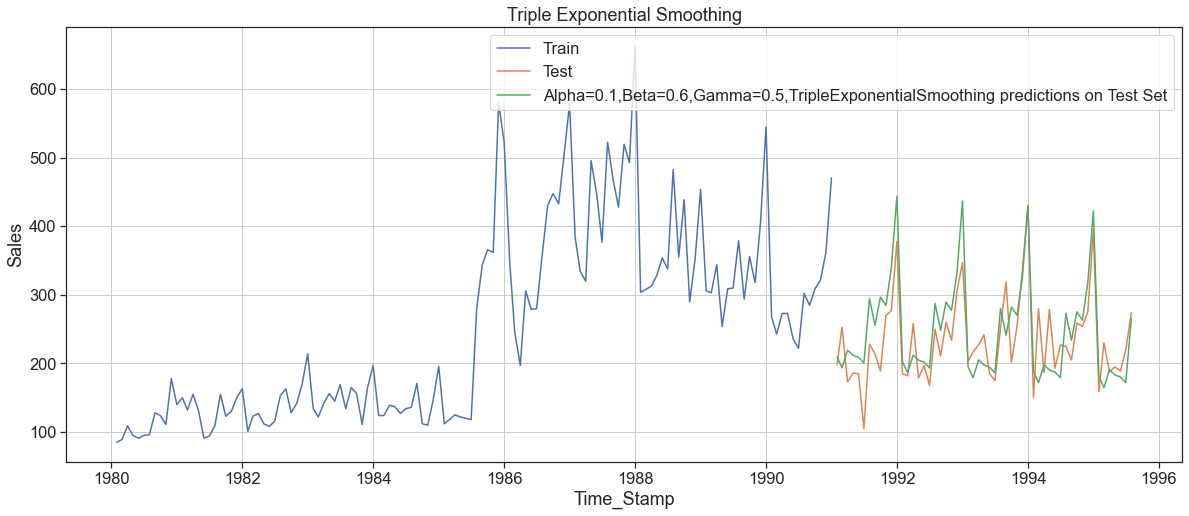

In [91]:
plt.figure(figsize=(20,8))
plt.plot(TES_train['Shoe_Sales'],label='Train')
plt.plot(TES_test['Shoe_Sales'],label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict',0.1, 0.6, 0.5],label='Alpha=0.1,Beta=0.6,Gamma=0.5,TripleExponentialSmoothing predictions on Test Set')
plt.title("Triple Exponential Smoothing")
plt.xlabel("Time_Stamp")
plt.ylabel("Sales")
plt.legend(loc='best')
plt.grid();

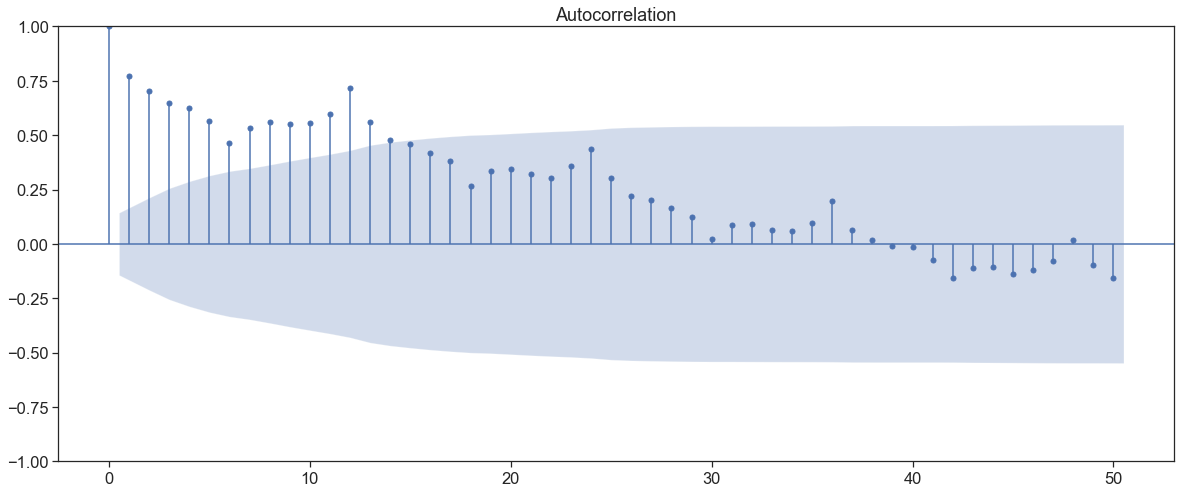

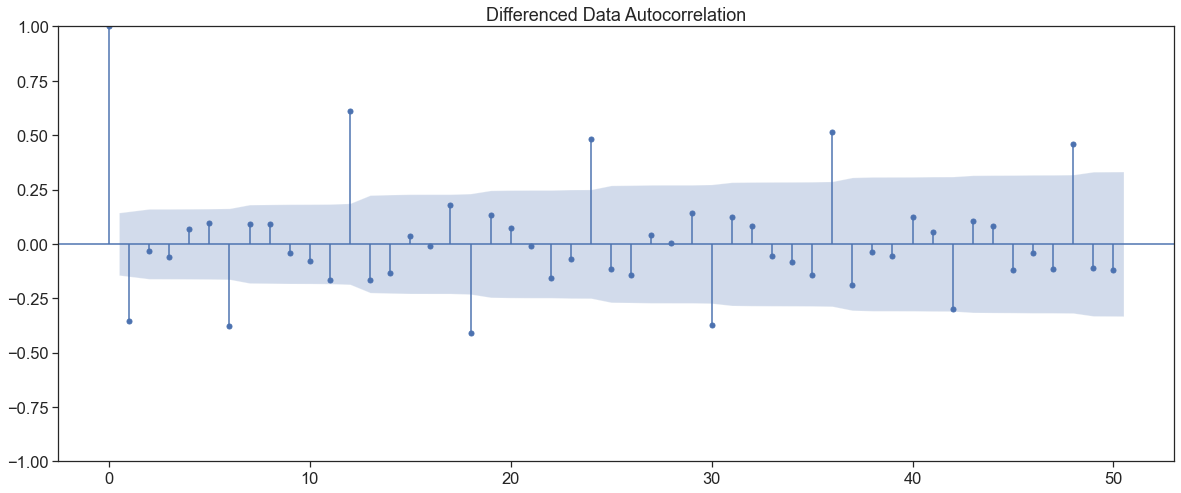

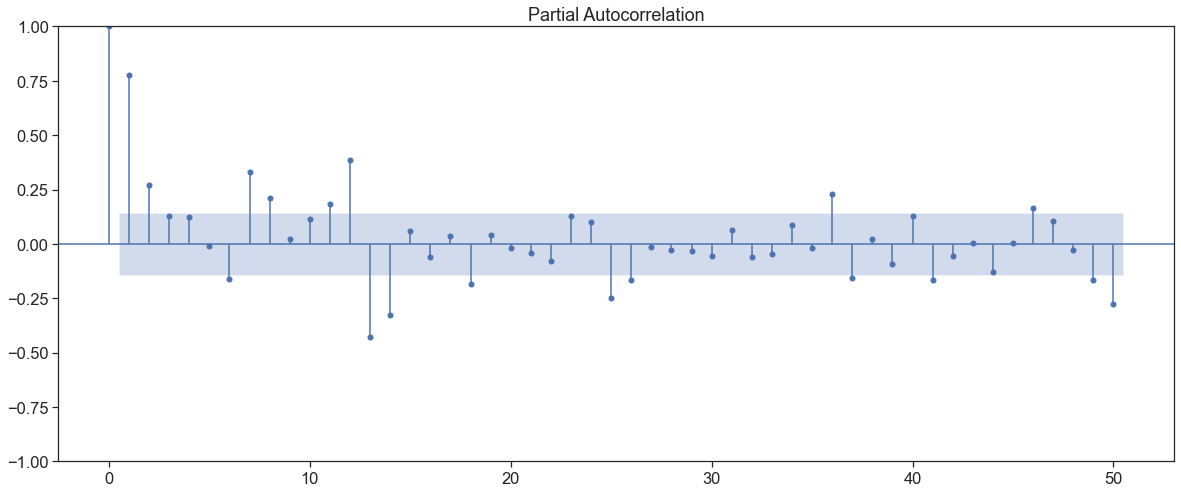

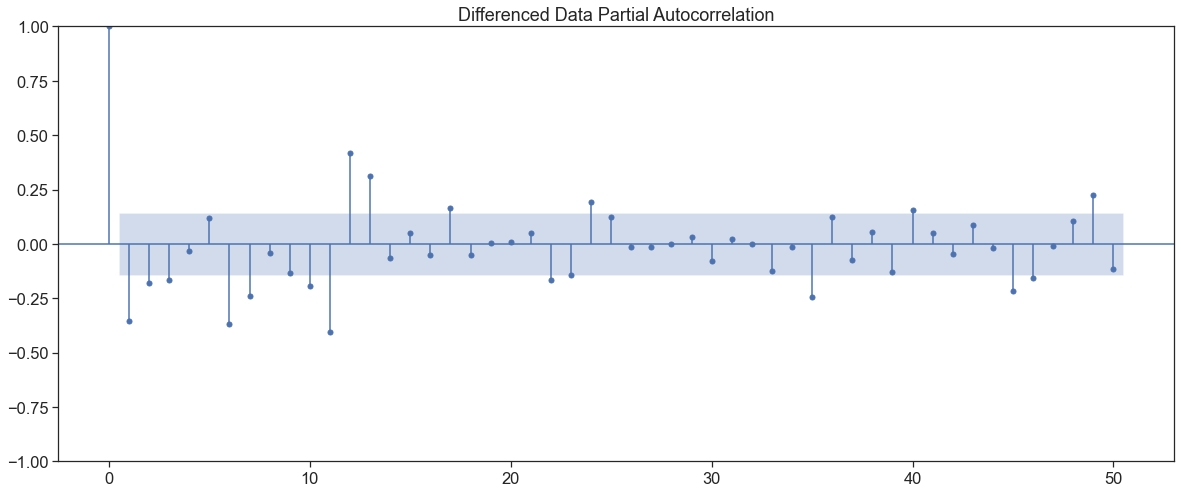

In [92]:
# Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.
plot_acf(shoe['Shoe_Sales'],lags=50)
plot_acf(shoe['Shoe_Sales'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(shoe['Shoe_Sales'],lags=50)
plot_pacf(shoe['Shoe_Sales'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [93]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.xlabel("Time_Stamp")
    plt.ylabel("Sales")
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

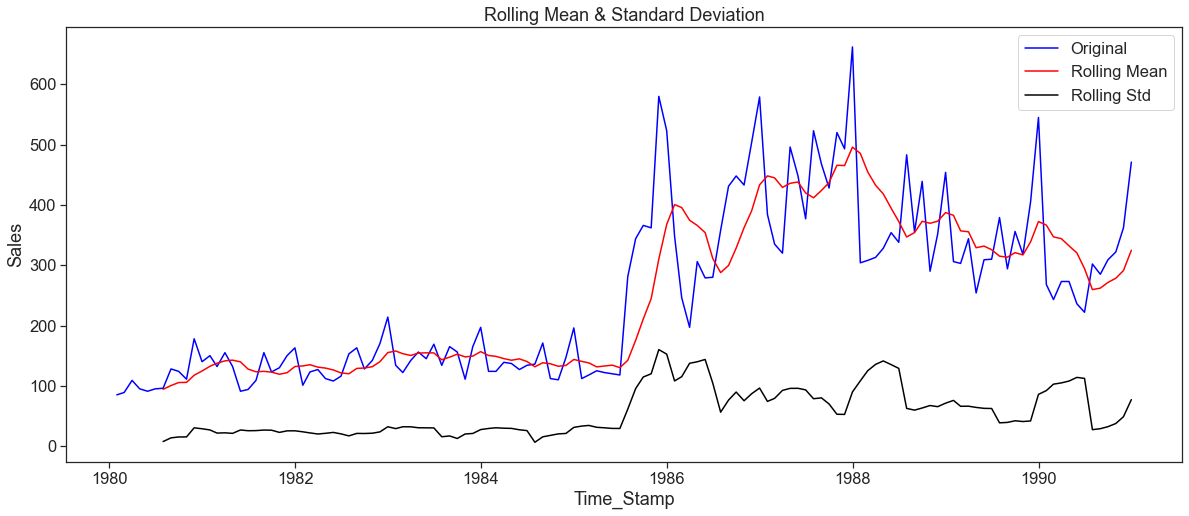

Results of Dickey-Fuller Test:
Test Statistic                  -1.361129
p-value                          0.600763
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [94]:
test_stationarity(train['Shoe_Sales'])

In [95]:
(train['Shoe_Sales'].diff()).dropna()

Time_Stamp
1980-02-29      4.0
1980-03-31     20.0
1980-04-30    -14.0
1980-05-31     -4.0
1980-06-30      4.0
              ...  
1990-08-31    -17.0
1990-09-30     24.0
1990-10-31     13.0
1990-11-30     40.0
1990-12-31    109.0
Name: Shoe_Sales, Length: 131, dtype: float64

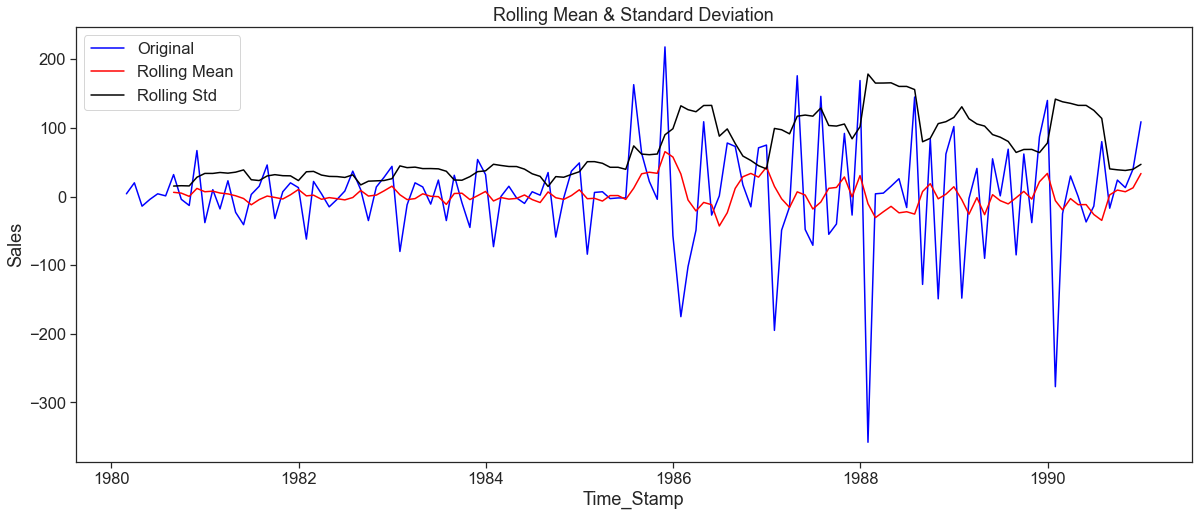

Results of Dickey-Fuller Test:
Test Statistic                  -3.144211
p-value                          0.023450
#Lags Used                      13.000000
Number of Observations Used    117.000000
Critical Value (1%)             -3.487517
Critical Value (5%)             -2.886578
Critical Value (10%)            -2.580124
dtype: float64 



In [96]:
test_stationarity(train['Shoe_Sales'].diff().dropna())

In [97]:
#Building ARIMA Model
p = q = range(0, 5)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (0, 1, 4)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (1, 1, 4)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (2, 1, 4)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)
Model: (3, 1, 4)
Model: (4, 1, 0)
Model: (4, 1, 1)
Model: (4, 1, 2)
Model: (4, 1, 3)
Model: (4, 1, 4)


In [98]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
for param in pdq:
    ARIMA_model = ARIMA(train['Shoe_Sales'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1508.2837722095956
ARIMA(0, 1, 1) - AIC:1497.0503224187926
ARIMA(0, 1, 2) - AIC:1494.9646053663378
ARIMA(0, 1, 3) - AIC:1495.148473873865
ARIMA(0, 1, 4) - AIC:1496.9838432393444
ARIMA(1, 1, 0) - AIC:1501.64312420119
ARIMA(1, 1, 1) - AIC:1492.487186507898
ARIMA(1, 1, 2) - AIC:1494.4238594574267
ARIMA(1, 1, 3) - AIC:1496.3858782557993
ARIMA(1, 1, 4) - AIC:1495.603603255911
ARIMA(2, 1, 0) - AIC:1498.9504830258975
ARIMA(2, 1, 1) - AIC:1494.4314983035601
ARIMA(2, 1, 2) - AIC:1496.4107391810157
ARIMA(2, 1, 3) - AIC:1480.8092880585777
ARIMA(2, 1, 4) - AIC:1484.9795052780446
ARIMA(3, 1, 0) - AIC:1498.930309422774
ARIMA(3, 1, 1) - AIC:1496.3468641048712
ARIMA(3, 1, 2) - AIC:1495.6558545480107
ARIMA(3, 1, 3) - AIC:1482.5660484625228
ARIMA(3, 1, 4) - AIC:1486.6354572925502
ARIMA(4, 1, 0) - AIC:1500.7938274685453
ARIMA(4, 1, 1) - AIC:1498.3468277038942
ARIMA(4, 1, 2) - AIC:1497.5315666903352
ARIMA(4, 1, 3) - AIC:1482.6352910551927
ARIMA(4, 1, 4) - AIC:1486.1154024359575


In [99]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
13,"(2, 1, 3)",1480.809288
18,"(3, 1, 3)",1482.566048
23,"(4, 1, 3)",1482.635291
14,"(2, 1, 4)",1484.979505
24,"(4, 1, 4)",1486.115402
19,"(3, 1, 4)",1486.635457
6,"(1, 1, 1)",1492.487187
7,"(1, 1, 2)",1494.423859
11,"(2, 1, 1)",1494.431498
2,"(0, 1, 2)",1494.964605


In [100]:
auto_ARIMA = ARIMA(train['Shoe_Sales'], order=(2,1,3),freq='M')
results_auto_ARIMA = auto_ARIMA.fit()
print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:             Shoe_Sales   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -734.405
Date:                Mon, 20 Jun 2022   AIC                           1480.809
Time:                        16:30:13   BIC                           1498.060
Sample:                    01-31-1980   HQIC                          1487.819
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0142      0.029      0.487      0.626      -0.043       0.071
ar.L2         -0.9971      0.018    -55.476      0.000      -1.032      -0.962
ma.L1         -0.3351      0.090     -3.720      0.0

In [101]:
#Predicting Test Data using models
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))
rmse_a = mean_squared_error(test['Shoe_Sales'],predicted_auto_ARIMA,squared=False)
print(rmse_a)

184.46932835421705


In [102]:
result_shoe = pd.DataFrame({'RMSE': [rmse_a]},index=['ARIMA(2,1,3) with AIC'])

result_shoe

,RMSE
"ARIMA(2,1,3) with AIC",184.469328


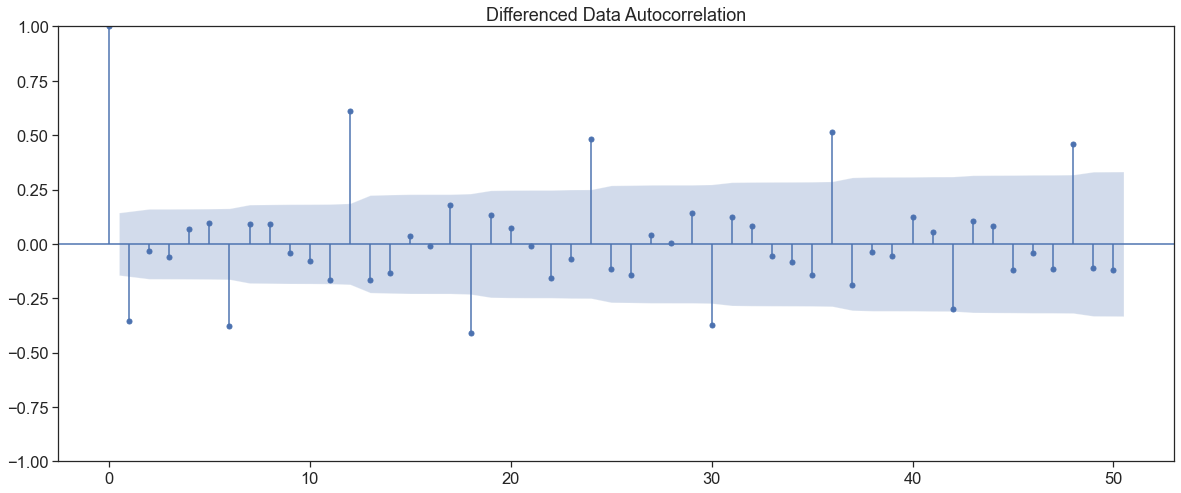

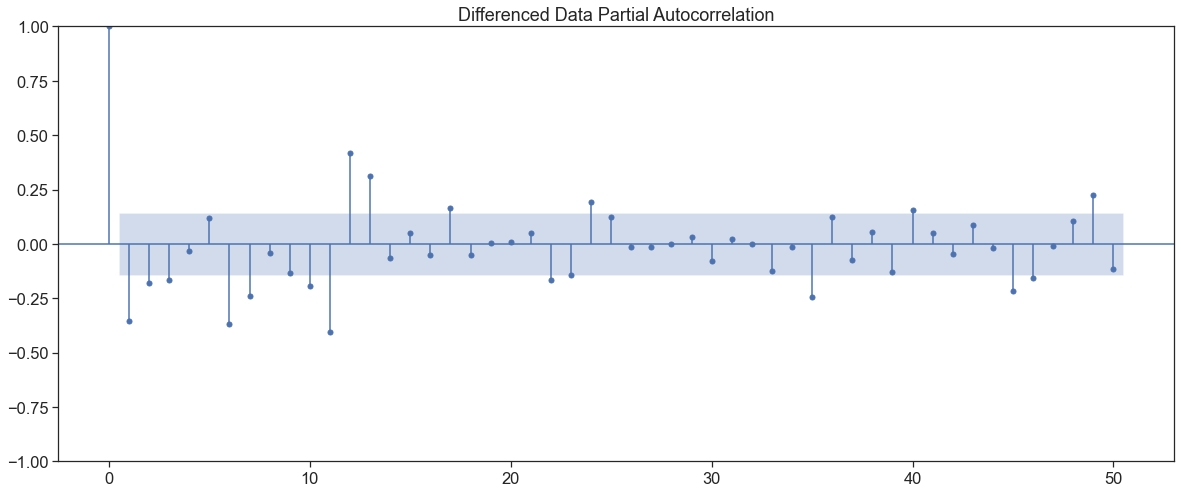

In [103]:
plot_acf(shoe['Shoe_Sales'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(shoe['Shoe_Sales'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [104]:
manual_ARIMA = ARIMA(train['Shoe_Sales'].astype('float64'), order=(3,1,1),freq='M')
results_manual_ARIMA = manual_ARIMA.fit()
print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:             Shoe_Sales   No. Observations:                  132
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -743.173
Date:                Mon, 20 Jun 2022   AIC                           1496.347
Time:                        16:30:15   BIC                           1510.723
Sample:                    01-31-1980   HQIC                          1502.188
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4794      0.125      3.850      0.000       0.235       0.723
ar.L2          0.0166      0.111      0.150      0.881      -0.200       0.234
ar.L3          0.0281      0.108      0.260      0.7

In [105]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [106]:
rmse_p = mean_squared_error(test['Shoe_Sales'],predicted_manual_ARIMA,squared=False)
print(rmse_p)

144.18393375203556


In [107]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse_p]},index=['ARIMA(3,1,1) with ACF/PACF'])
result_shoe = pd.concat([result_shoe,temp_resultsDf])
result_shoe

,RMSE
"ARIMA(2,1,3) with AIC",184.469328
"ARIMA(3,1,1) with ACF/PACF",144.183934


In [108]:
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [109]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Shoe_Sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic},
                                       ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1497.7788474019549
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1338.3663267373167
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1208.4142473347138
SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:2894.4937955644104
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1327.3970510547892
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1312.5867978686551
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1187.084399500866
SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:4253.131230106119
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1201.0600831567197
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1200.7545174421416
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1188.039630501081
SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:2561.8234519102157
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:1071.7371393677752
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:1073.5912665501492
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:1074.3858105914205
SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:3519.971415364299
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1476.016777738261
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1318.3861206387694
SARIMA(0, 1, 1)

SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:1166.1030148364075
SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:4243.432074944511
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:1168.6663425966904
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:1168.520870579318
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:1167.676693370056
SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:2599.951629938529
SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:1045.560242487804
SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:1046.717339625074
SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:1046.2045147531767
SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:6557.731054474336
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:1464.1902793424968
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1308.2038016785132
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:1176.4764240716522
SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:3790.6314137314553
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1293.3977262904461
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1279.6661104290065
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:1158.490991313956
SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:4106.652714801192
SARIMA(2, 1, 2)x(2,

In [110]:
SARIMA_AIC.sort_values(by=['AIC']).head(10)

,param,seasonal,AIC
223,"(3, 1, 1)","(3, 0, 3, 12)",22.0
191,"(2, 1, 3)","(3, 0, 3, 12)",24.0
47,"(0, 1, 2)","(3, 0, 3, 12)",99.847419
63,"(0, 1, 3)","(3, 0, 3, 12)",230.534029
111,"(1, 1, 2)","(3, 0, 3, 12)",305.927013
95,"(1, 1, 1)","(3, 0, 3, 12)",411.105246
206,"(3, 1, 0)","(3, 0, 2, 12)",1035.710703
220,"(3, 1, 1)","(3, 0, 0, 12)",1035.907113
222,"(3, 1, 1)","(3, 0, 2, 12)",1035.909874
204,"(3, 1, 0)","(3, 0, 0, 12)",1036.067322


In [111]:
auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Shoe_Sales'].values,
                                order=(3, 1, 0),
                                seasonal_order=(3, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  132
Model:             SARIMAX(3, 1, 0)x(3, 0, [1, 2], 12)   Log Likelihood                -508.855
Date:                                 Mon, 20 Jun 2022   AIC                           1035.711
Time:                                         16:35:56   BIC                           1058.407
Sample:                                              0   HQIC                          1044.871
                                                 - 132                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3834      0.093     -4.125      0.000      -0.566      -0

In [112]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [113]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,224.026410,57.754320,110.830022,337.222797
1,199.659566,67.849901,66.676203,332.642928
2,210.623085,80.475623,52.893761,368.352408
3,238.094122,88.618548,64.404960,411.783285
4,219.827464,97.503319,28.724471,410.930457


In [114]:
rmse_sp = mean_squared_error(test['Shoe_Sales'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse_sp)

73.01251477392911


In [115]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse_sp]},index=['SARIMA(3, 1, 0)(3, 0, 2, 12)with AIC'])
result_shoe = pd.concat([result_shoe,temp_resultsDf])
result_shoe

,RMSE
"ARIMA(2,1,3) with AIC",184.469328
"ARIMA(3,1,1) with ACF/PACF",144.183934
"SARIMA(3, 1, 0)(3, 0, 2, 12)with AIC",73.012515


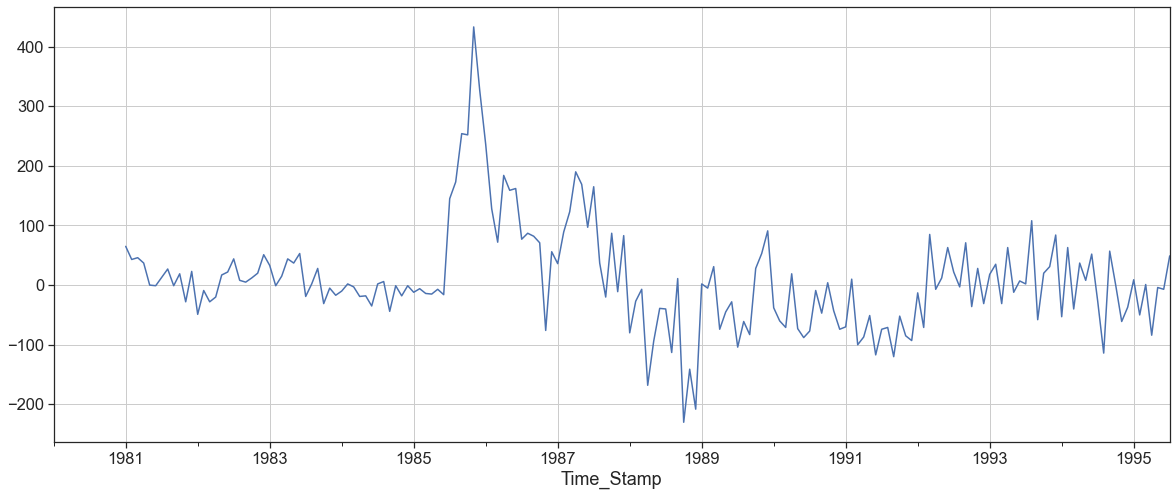

In [116]:
(shoe['Shoe_Sales'].diff(12)).plot()
plt.grid();

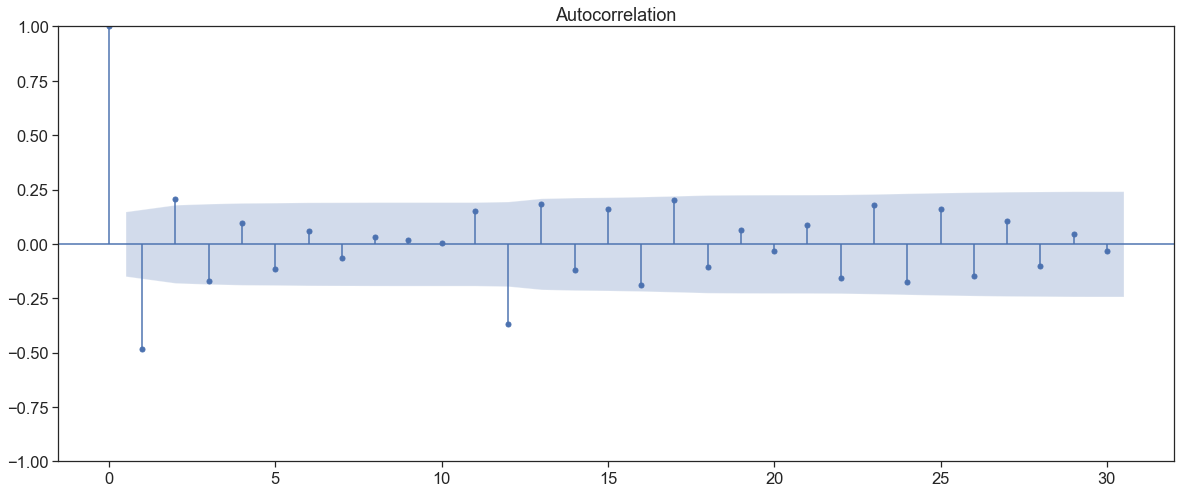

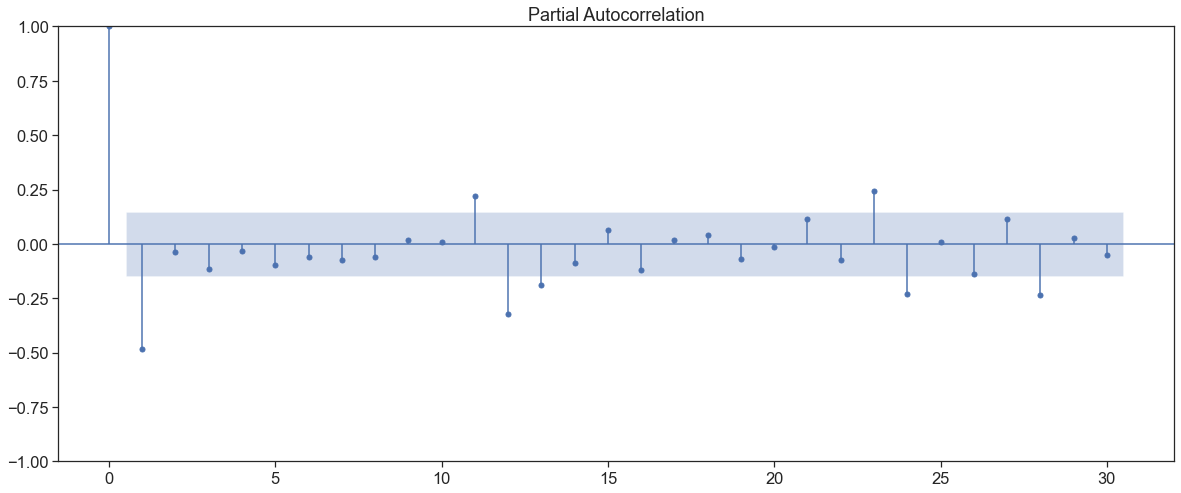

In [117]:
plot_acf((shoe['Shoe_Sales'].diff(12).dropna()).diff(1).dropna(),lags=30)
plot_pacf((shoe['Shoe_Sales'].diff(12).dropna()).diff(1).dropna(),lags=30);

In [118]:
manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Shoe_Sales'].values,
                                order=(3, 1, 1),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(1, 0, [1, 2], 12)   Log Likelihood                -575.205
Date:                                 Mon, 20 Jun 2022   AIC                           1166.411
Time:                                         16:35:57   BIC                           1187.642
Sample:                                              0   HQIC                          1175.014
                                                 - 132                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3575      0.206      1.739      0.082      -0.045       0

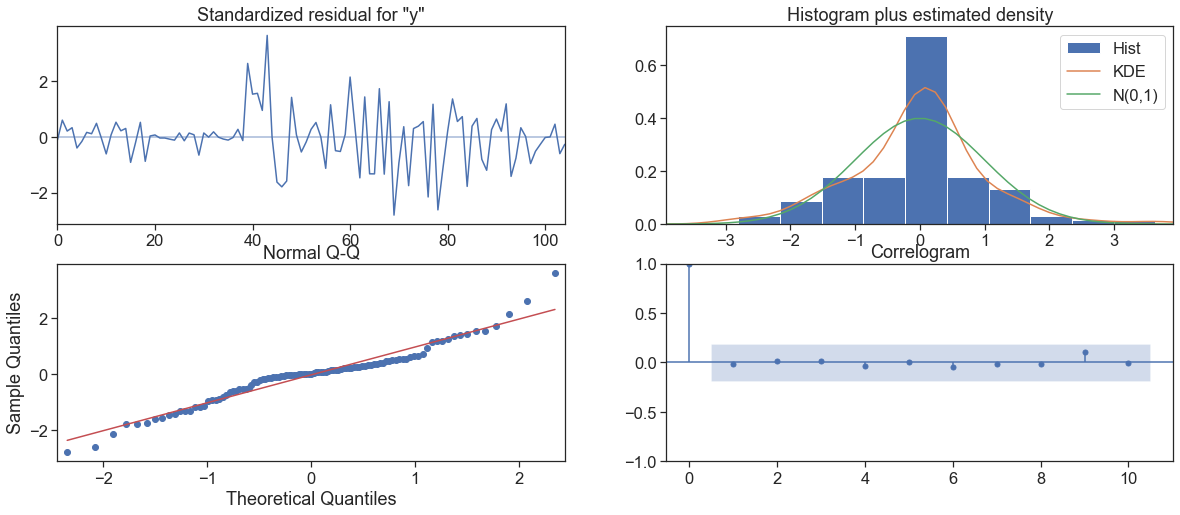

In [119]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

In [120]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [121]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()
rmse_spm = mean_squared_error(test['Shoe_Sales'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse_spm)

66.4024622558063


In [122]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse_spm]},index=['SARIMA(3,1,1)(1,0,2,12) with ACF/PACF'])
result_shoe = pd.concat([result_shoe,temp_resultsDf])
result_shoe

,RMSE
"ARIMA(2,1,3) with AIC",184.469328
"ARIMA(3,1,1) with ACF/PACF",144.183934
"SARIMA(3, 1, 0)(3, 0, 2, 12)with AIC",73.012515
"SARIMA(3,1,1)(1,0,2,12) with ACF/PACF",66.402462


In [123]:
full_data_model = sm.tsa.statespace.SARIMAX(shoe['Shoe_Sales'],
                                order=(3,1,1),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                        SARIMAX Results                                        
Dep. Variable:                              Shoe_Sales   No. Observations:                  187
Model:             SARIMAX(3, 1, 1)x(1, 0, [1, 2], 12)   Log Likelihood                -864.048
Date:                                 Mon, 20 Jun 2022   AIC                           1744.095
Time:                                         16:35:59   BIC                           1768.696
Sample:                                     01-31-1980   HQIC                          1754.085
                                          - 07-31-1995                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2604      0.168      1.549      0.121      -0.069       0

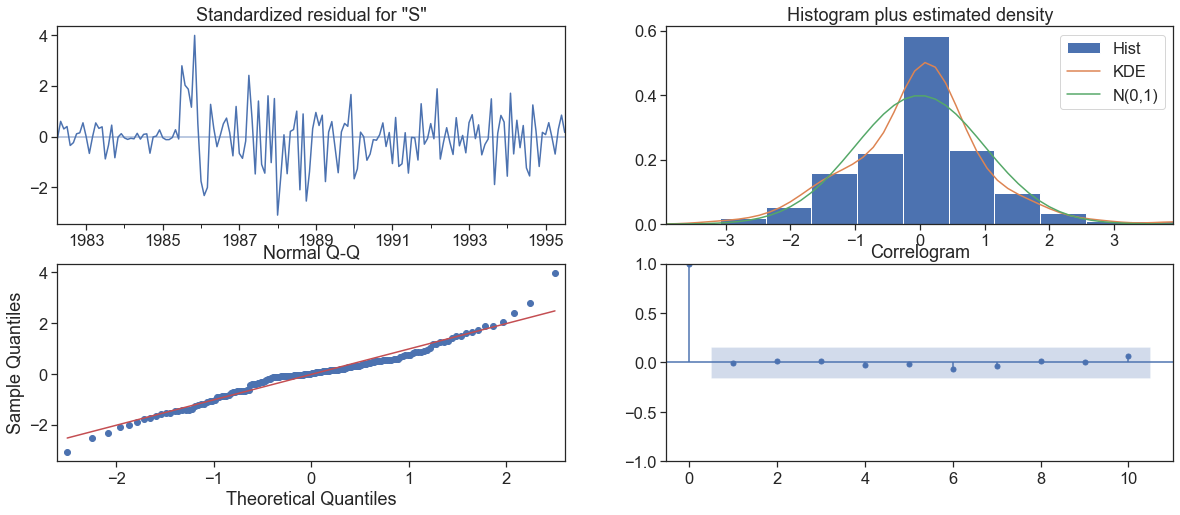

In [124]:
results_full_data_model.plot_diagnostics();

In [125]:
predicted_manual_SARIMA_6_full_data = results_full_data_model.get_forecast(steps=12)

In [126]:
predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).head()

Shoe_Sales,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-31,260.857332,50.764640,161.360466,360.354198
1995-09-30,276.018142,56.430328,165.416731,386.619553
1995-10-31,269.325509,64.393805,143.115970,395.535047
1995-11-30,320.351172,68.272624,186.539288,454.163055
1995-12-31,413.457033,72.309333,271.733345,555.180721


In [127]:
rmse_f = mean_squared_error(shoe['Shoe_Sales'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse_f)

RMSE of the Full Model 50.86907096624988


In [128]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-01',end='1996-08-01', freq='M'))

In [129]:
pred_full_manual_SARIMA_date

Shoe_Sales,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-31,260.857332,50.764640,161.360466,360.354198
1995-09-30,276.018142,56.430328,165.416731,386.619553
1995-10-31,269.325509,64.393805,143.115970,395.535047
1995-11-30,320.351172,68.272624,186.539288,454.163055
1995-12-31,413.457033,72.309333,271.733345,555.180721
1996-01-31,196.837020,75.452549,48.952741,344.721299
1996-02-29,218.085291,78.516685,64.195417,371.975165
1996-03-31,207.170587,81.329679,47.767345,366.573829
1996-04-30,219.644938,84.062057,54.886334,384.403541
1996-05-31,206.415258,86.659120,36.566505,376.264012


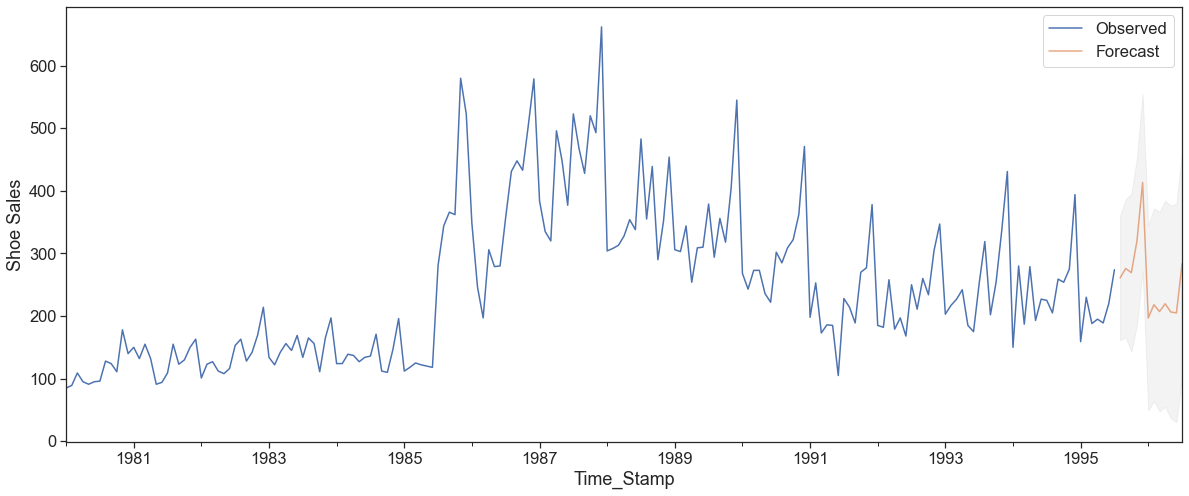

In [130]:
axis = shoe['Shoe_Sales'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.05)
axis.set_xlabel('Time_Stamp')
axis.set_ylabel('Shoe Sales')
plt.legend(loc='best')
plt.show()

In [131]:
result_shoe

,RMSE
"ARIMA(2,1,3) with AIC",184.469328
"ARIMA(3,1,1) with ACF/PACF",144.183934
"SARIMA(3, 1, 0)(3, 0, 2, 12)with AIC",73.012515
"SARIMA(3,1,1)(1,0,2,12) with ACF/PACF",66.402462


In [132]:
results['Test RMSE']

RegressionOnTime                                                   266.276472
NaiveModel                                                          73.685079
SimpleAverageModel                                                  63.984570
2pointTrailingMovingAverage                                         45.948736
4pointTrailingMovingAverage                                         57.872686
6pointTrailingMovingAverage                                         63.456893
9pointTrailingMovingAverage                                         67.723648
Alpha=0.1,SimpleExponentialSmoothing                               115.874445
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing                       76.918569
Alpha=0.570,Beta=0.0001,Gamma=0.2937,TripleExponentialSmoothing    128.992526
Name: Test RMSE, dtype: float64

In [133]:
results1 = pd.DataFrame({'Test RMSE': [rmse_model1_test,rmse_model2_test,rmse_model3_test,rmse_model4_test_2,
                                       rmse_model4_test_4,rmse_model4_test_6,rmse_model4_test_9,mape_model5_test_1,
                                       resultsDf_6['Test RMSE'][0],resultsDf_7['Test RMSE'][0],
                                      rmse_model8_test_1,resultsDf_8_2f.iloc[0,4],rmse_a,rmse_p,rmse_sp,rmse_spm,rmse_f]},
                       index=['RegressionOnTime','NaiveModel','SimpleAverageModel','2pointTrailingMovingAverage',
                              '4pointTrailingMovingAverage','6pointTrailingMovingAverage','9pointTrailingMovingAverage',
                              'Alpha=0.098,SimpleExponentialSmoothing','Alpha=0.1,SimpleExponentialSmoothing using Brute',
                              'Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing using Brute',
                              'Alpha=0.570,Beta=0.0001,Gamma=0.2937,TripleExponentialSmoothing',
                              'Alpha=0.1,Beta=0.6,Gamma=0.5,TripleExponentialSmoothing using Brute','ARIMA(2,1,3) with AIC',
                              'ARIMA(3,1,1) using ACF/PACF',
                              'SARIMA(3,1,1)(3,0,2,12) with AIC','SARIMA(3,1,1)(1,0,2,12) using ACF/PACF','RMSE of the Full Model'
                             ])

In [134]:
results1

,Test RMSE
RegressionOnTime,266.276472
NaiveModel,73.685079
SimpleAverageModel,63.984570
2pointTrailingMovingAverage,45.948736
4pointTrailingMovingAverage,57.872686
6pointTrailingMovingAverage,63.456893
9pointTrailingMovingAverage,67.723648
"Alpha=0.098,SimpleExponentialSmoothing",79.920000
"Alpha=0.1,SimpleExponentialSmoothing using Brute",115.874445
"Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing using Brute",76.918569


In [135]:
tripleES_full_shoe = ExponentialSmoothing(shoe, trend='additive', seasonal='multiplicative').fit(smoothing_level=0.1, 
                                                                                                 smoothing_trend=0.6, 
                                                                                                 smoothing_seasonal=0.5)

In [136]:
print(tripleES_full_shoe.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:               Shoe_Sales   No. Observations:                  187
Model:             ExponentialSmoothing   SSE                        1734286.923
Optimized:                         True   AIC                           1740.245
Trend:                         Additive   BIC                           1791.942
Seasonal:                Multiplicative   AICC                          1744.316
Seasonal Periods:                    12   Date:                 Mon, 20 Jun 2022
Box-Cox:                          False   Time:                         16:36:00
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.1000000                alpha                False
smoothing_trend          

In [137]:
predicted_TES_full_data = tripleES_full_shoe.forecast(12)

In [138]:
predicted_TES_full_data

1995-08-31    217.075839
1995-09-30    222.312352
1995-10-31    240.438618
1995-11-30    287.457119
1995-12-31    399.533685
1996-01-31    172.170271
1996-02-29    253.259789
1996-03-31    218.805535
1996-04-30    249.478034
1996-05-31    223.874375
1996-06-30    251.165600
1996-07-31    260.227812
Freq: M, dtype: float64

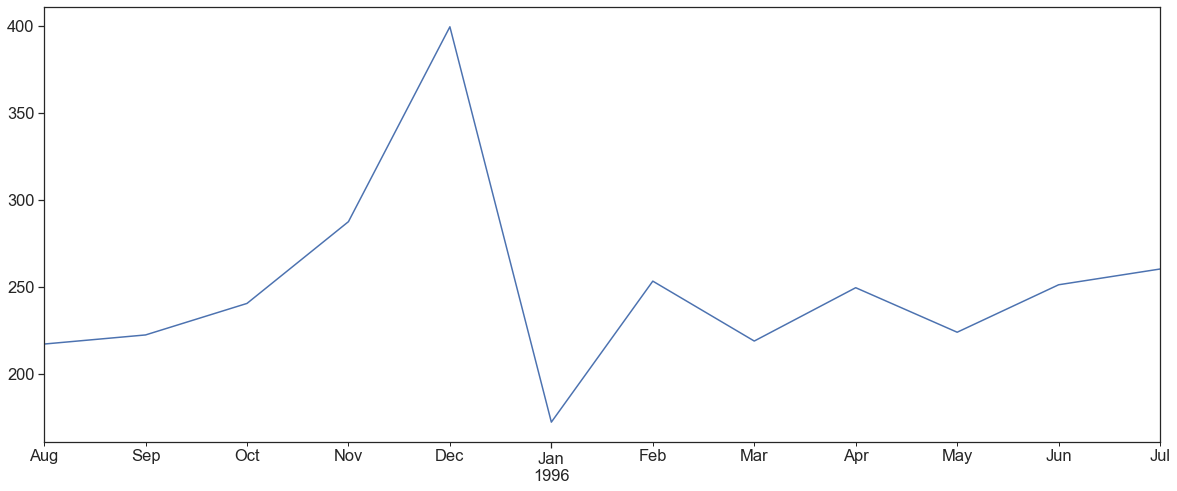

In [139]:
predicted_TES_full_data.plot();

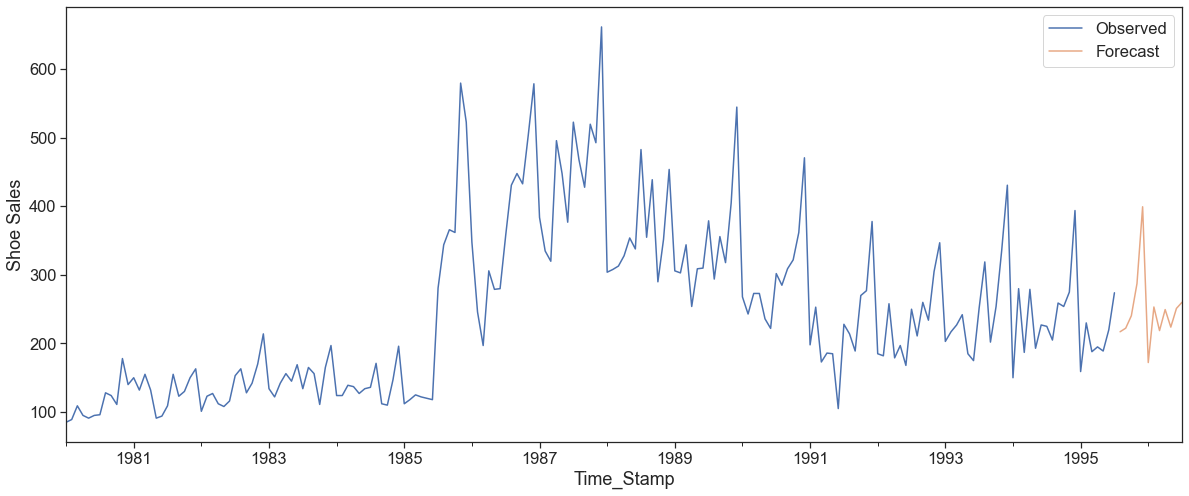

In [140]:
plt.figure(figsize=(20,8))
axis = shoe['Shoe_Sales'].plot(label='Observed')
predicted_TES_full_data.plot(ax=axis, label='Forecast', alpha=0.7)
axis.set_xlabel('Time_Stamp')
axis.set_ylabel('Shoe Sales')
plt.legend(loc='best')
plt.show()

